# **General Pandas Introduction**

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gawron/python-for-social-science/blob/master/pandas/general_pandas_intro.ipynb)

**Continuity note**: *This NB combines elements of general_pandas_intro.ipynb with pandas.ipynb and supercedes both of them.**

## **Lesson 1**  

**Create Data** - We begin by creating our own data set for analysis. This gives us a toy example to illustrate some basic operations with.   

**Get Data** - We will learn how to read in data from the web.  The first dataset consist of baby names and the number of babies with those names in multiple years.  Flexibility 
at inputting  data in various formats is one of `pandas` strengths, though we won't
explore that much today.

**Analyze Data** - We step though some simple analytical tasks with the baby names data
and extend what we know with some other data sets.

**Present Data** - We plot some data in graphs, mostly via the very helpful plotting facilities `pandas` offers, and peek under the hood a bit at the default pandas backend
for plotting, `matplotlib`.
    

The goal of this notebook is to introduce the two main `pandas` data types, `DataFrame`  and `Series`, and to introduce to some basic
analytical tools, pivot tables, cross tabulations, and grouping. For much more detailed background on Pandas data structures, see http://pandas.pydata.org/pandas-docs/dev/dsintro.html.

The `matplotlib` library will only be needed for the data presentation (plotting) exercises. 

In [9]:
# Import all libraries needed for the tutorial

##import (library) as (give the library a nickname/alias)
import numpy as np
import pandas as pd  
# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv

# The usual preamble when using matplotlib. 
# Most of the code we call is in pyplot.
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
#pd.set_option('display.mpl_style', 'default') 
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

This notebook was prepared with the following version
of `pandas`.   The sort of basic functionality illustrated here
shouldn;'t change much from version, but if do have issues reproducing
what's in this notebook, re-execute the next cell and see
if there's a change.  Report the version of pandas you used when reporting
an issue.

```
pandas version used 1.3.5
```

In [2]:
print(f'Pandas version {pd.__version__}')

Pandas version 1.3.5


# Create Data  

Let's start with a toy dataset, then we'll ramp up.

The data set will consist of 5 baby names and the number of births recorded for a particular year (1880, as it happens).

In [4]:
# The initial set of baby names and birth rates
names = ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]

To merge these two lists together we will use the ***zip*** function.

In [5]:
BabyDataSet = list(zip(names,births))
print(BabyDataSet)

[('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578), ('Mel', 973)]


We next create a DataFrame.

***df*** will be a ***DataFrame*** object. You can think of this object holding the contents of the BabyDataSet in a format similar to a sql table or an excel spreadsheet. Lets take a look below at the contents inside ***df***.

In [426]:
df = DataFrame(data = BabyDataSet, columns=['Names', 'Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


This `pandas` `DataFrame`
consists of 5 rows and 2 columns.  The numbers along the left edge are the index.  The general idea is that the index of a DataFrame provides a unique identifier
for each row.  The index in this toy example looks like a positional (numerical) index,
but an index does not have to be numbers and even if it is numerical, the numbers
do not have to be sequential, as we will show shortly.

**Names** and **Births** are column names, or **headers** similar to the ones found in an Excel spreadsheet or sql database.

For now, the best way to think of a DataFrame is as a 2D array  that uses keyword indexing
instead of positional indexing.  We give some examples of indexing in
the next section.

First let's illustrate some basic structural ideas of DataFrames.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Names   5 non-null      object
 1   Births  5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


As this output suggests, the rows are indexed; each column has a data type.

The data type `object` seen  in the above info printout is the data type `pandas` for to columns containing strings; indeed the column labeled `Names` is a column whose entries are all strings.  Similarly, the column labeled `Births` is a column of name counts, so we expect `integer` to be the type and it is (`int64` is a `numpy` internal type for
integers).

Like arrays, selection may be either by rows or columns, or combinations
of both.  The column names and the index should be thought of as the keywords for
column selection and row selection, respectively.  The index is simply some sequence
of unique ids for each row, usually strings or numbers. It just happens to be a range
of numbers in this toy example. 

Illustrating `int64`, integers in numpy arrays and pandas integer-typed columns will by default be of type `np.int64`.

In [615]:
# Oridnary Python integers are not of type np.int64
isinstance(1,np.int64)

False

In [616]:
# Integers in numpy arrays are
isinstance(np.array([1])[0],np.int64)

True

# Selecting Columns

Columns in a pandas `DataFrame` are accessed by keyword (column name).

In [469]:
df['Names']

0        Bob
1    Jessica
2       Mary
3       John
4        Mel
Name: Names, dtype: object

This is a column; as the output shows, the DataFrame indices persist.

This makes a DataFrame look like a dictionary with column names as keys
and columns as values.  In many contexts this is not a bad way to think about it.


The data type of a column in pandas is `Series`. 
The column name is an attribute, though it is possible for a `Series` to be lacking this
attribute:

In [17]:
df['Names'].name

'Names'

Where a `DataFrame` is the `pandas` analogue of a 2D array, a `Series` is the `pandas` analogue of a 1D array.  Hence `Series` is the data type for both rows and columns.

In [470]:
type(df['Names'])

pandas.core.series.Series

The items in the Series the column may be selected by  index:

In [103]:
df['Names'][2]

'Mary'

This demonstrates how to get to a value in a cell in a DataFrame in one expression.

# Selecting rows

`pandas` has two basic ways of selecting rows: 

1. Using the index, via the `.loc` attribute
2. Specifying some value in some column 

Let's look at selection by index first:

In [50]:
df.loc[2]

Names     Mary
Births      77
Name: 2, dtype: object

Note we **can't** write:

In [424]:
# This produces a KeyError
# df[2]

That first indexing position of a DataFrame is reserved for column names; this
`KeyError` arises because 2 is not a column name for this `df`.

Given a Dataframe and the name of a row (again, an index element does not have to be
a number), `df.loc[RowName]` returns the row:

In [427]:
df.loc[2]

Names     Mary
Births      77
Name: 2, dtype: object

As might be expected, `df.loc[2]`, being 1D, is a Series.

In [428]:
type(df.loc[2])

pandas.core.series.Series

Many of  the ideas about indexing that we learned about with ndarrays and positional
indexing carry over to keyword indexing in `pandas`.

For example, using a splice, we return a sequence of rows, and a sequence of rows is generally going to come wrapped in a DataFrame:

In [429]:
print(df.loc[2:4])
type(df.loc[2:4])

  Names  Births
2  Mary      77
3  John     578
4   Mel     973


pandas.core.frame.DataFrame

What's a little surprising here is that we got 3 rows, where from all our experience
with `numpy` slicing, we would expect 2.  This is not a bug; the motivation
is that we are not indexing by position, but by the names of elements
in the index.  More on this below when we discuss DataFrame indexes in a little more detail.

So we've seen how to get a column (1D), a row (1D), and multiple rows (2D).

Now let's look at how to get 
the value at a particular row and column position (0D): We can do as we do
with numpy 2D arrays, we specify a row and a column.

In [430]:
df.loc[2,'Names']

'Mary'

Notice this is same value we retrieved before with the following expression.

In [431]:
df['Names'][2]

'Mary'

when we were coming at things column-first.  As we will see, the `.loc` syntax 
implements the view that `DataFrames` are 2D arrays with keyword indexing;
following the convention with ndarrays, the row comes first, the column second.
The column first syntax implements the view that `DataFrames` are dictionaries
with column names as keys and columns as values.

# Boolean conditions

The basic syntax for selecting a row or rows with a fixed value in some column is

In [432]:
df[df['Names']=='Mary']

,Names,Births
2,Mary,77


What we are actually doing with such an expressions is using Boolean indexing.  What is actually returned is a DataFrame containing all the rows where the "Names" column contains
the given value.

We explain this in the next few examples.

## Selecting Rows with Boolean Conditions

Overview: The process of selecting rows by values involves two steps
1. We use a Boolean conditions on a column (a 1D `pandas` Series object) much as we did on `numpy` 1D arrays. The result is a `Boolean Series`.
2. We use the Boolean Series as a mask to select a set of rows, just as we did with arrays.

First  we place a Boolean condition on a column.  

This works just as
it did in numpy,  The condition is applied elementwise to the elements in the colomn:

In [433]:
print(df['Births'])
print()
print(df['Births'] > 500)

0    968
1    155
2     77
3    578
4    973
Name: Births, dtype: int64

0     True
1    False
2    False
3     True
4     True
Name: Births, dtype: bool


The result is also a `Series`, just one containing Boolean values. 

In [7]:
type(df['Births'] > 500)

pandas.core.series.Series

Continuing the analogy with `numpy`: Just as we could use a 1D Boolean array 
as Boolean mask to index a
numpy 2D array, so we can use a pandas Boolean Series to mask a pandas DataFrame.

In [65]:
df.loc[df['Births'] > 500]

,Names,Births
0,Bob,968
3,John,578
4,Mel,973


Here we use `df.loc`  for consistency with our previous examples of row-selection.

Somewhat surprisingly, given that in `df[name]`, `name` must be a column name,
`df[BooleanSeries]` is a synonym of `df.loc[BooleanSeries]`. The condition
is the same as with numpy Boolean arrays: The Boolean Series must have the same number
of rows as `df`.

Hence the following expression is the simpler, more standard
way of doing what we did in the example above.

In [63]:
df[df['Births'] > 500]

,Names,Births
0,Bob,968
3,John,578
4,Mel,973


## Combining Conditions with Boolean operators

In `numpy` `&` is an operator that performs an elementwise `and` on two Boolean arrays,
producing a Boolean array that only has `True` wherever both the input arrays have `True`. 

In [69]:
import numpy as np
a = np.array([True,False,True])
b= np.array([False,True,True])
print('a', a)
print('b', b)
print('a & b', a&b)

a [ True False  True]
b [False  True  True]
a & b [False False  True]


Let B1 and B2 be two Boolean Series.

The  `&` operator can also be used to combine two
Boolean Series instances.  The result is a single Boolean Series that finds the rows that satisfy **both** conditions.

In [ ]:
df[(df['Births'] > 500) & (df['Births'] < 900)]

,Names,Births
3,John,578


Note that the parentheses are  **needed** here.

The problem is that `500 & 968` can be interpreted as bitwise-and of
two integers, which is a valid operation on their binary representations.

In [437]:
# Binary rep of 968 is 10 digits long
print(f'{968:010b}')
# Binary rep of 500 padded with 0 to be 10 digits long.
print(f'{500:010b}')
print(f'{500&968:010b}')
500 & 968

1111001000
0111110100
0111000000


448

Therefore, we can interpret bitwise & of an integer and
an integer Series by taking the bitwise &  of 500 and each element
in the Series, resulting in the following.

In [438]:
print(df['Births'])
500 & df['Births']

0    968
1    155
2     77
3    578
4    973
Name: Births, dtype: int64


0    448
1    144
2     68
3     64
4    452
Name: Births, dtype: int64

There are still other ways of interpreting how the `&` works in

```
df[df['Births'] > 500 & df['Births'] < 900].
```

The bottom line is that when this expression
is typed without parentheses, there are four legal interpretations of
what `&` is conecting,
which can be clarified by including the parentheses appropriate
for each:

1. df[(df['Births'] > 500) & (df['Births'] < 900)]  The one we want.
2. df[(df['Births'] > 500 & df['Births']) < 900] 
3. df[df['Births'] > (500 & df['Births'] < 900)] 
4. df[df['Births'] > (500 & df['Births']) < 900] 

In choosing which of these is right, the Python parser in effect
has to guess where to put the
parentheses. The first 3 are actually well formed and do not
raise an error.  Unfortunately, the parser goes for number 4,
which does cause an error.  The same error is
raised by other examples placing an array in between
two inequalities:

```
a = np.array([False, True])
# Value Error. The truth value of a Series is ambiguous. 
1 < a < 1
```

The array causes the inequality to be ambiguous,  since

```
(1 < a) < 1
1 < (a < 1)
```
produce different answers; rather than choose an interpretation,
the numpy designers have raised an exception for expressions like this, 
probably because of implementation details.

Illustrating by using the expression without parentheses:

In [612]:
# This is  Value Error
#df[df['Births'] > 500 & df['Births']< 900]

Bottom line.  When using Boolean combinations to select rows,
please include parentheses to clarify your intention.

More general lesson.  When faced with Type- and Value- Errors
that seem inexplicable to you, after checking that the values
in the expression being executed are what you want,
consider the possibility that the Python parser is finding
an interpretation of a complicated expression that
you don't want.  What can you do if that's
true?  Use parentheses. 

Another general lesson.  Use parentheses in expressions with multiple
operators.  The worst case scenario is not that there is an error,
but that there isn't.

In [457]:
3 * 2 + 5

11

Did you mean 3 * (2 + 5)?  Well, that's not what you got!

In [458]:
 3 * (2 + 5)

21

In general, getting the wrong answer in a complicated computation because of
a missing pair of parentheses is going to be an **extremely** hard debugging
task, especially if your code is sprinkled with such expressions. The moral:
put in the parentheses, even when you're sure they don't matter:

In [459]:
(3 * 2) + 5

11

As with `numpy` arrays, Series may also be combined with "bitwise not" (`~`) and "bitwise or" (`|`).

The names which were used over 500 times but not 578 times:

In [71]:
df[(df['Births'] > 500) & ~(df['Births'] == 578)]

,Names,Births
0,Bob,968
4,Mel,973


The names whose frequency does not fall between 500 and 900:

In [72]:
df[(df['Births'] < 500) | (df['Births'] > 900)]

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
4,Mel,973


## Getting values after applying Boolean conditions

Returning to our original example:

In [79]:
df[df['Names']=='Mary']

,Names,Births
2,Mary,77


We see that this is just a single Boolean condition that happens to return a single row. 

This is a 2D object, hence a DataFrame, so we can do column selection on this 

In [80]:
df[df['Names']=='Mary']['Births']

2    77
Name: Births, dtype: int64

So this expression more or less answers the question: "How many children were named 'Mary'?"

Note that what we are doing here is applying keyword indexing to a DataFrame;
consistent with all the examples above, what is returned is the `Births` column of that DataFrame, a Series of length 1 containing
the integer 77. 

In [81]:
print(type(df[df['Names']=='Mary']['Births']))

<class 'pandas.core.series.Series'>


The `Series` class provides an easy way to get to the values in the Series: the `.values`
attribute.  But this always returns an array, in this case an array of length 1.

In [82]:
df[df['Names']=='Mary']['Births'].values

array([77])

In sum, if we want to get to the integer answering the question "How many children were named 'Mary'?", we can do one of several things:

Option A:

In [83]:
df[df['Names']=='Mary']['Births'].values[0]

77

Or Option B:

In [85]:
df[df['Names']=='Mary']['Births'][2]

77

Since the sole row in this series has index 2.  This option is not very helpful since it requires knowing the index of the row whose "Names" value is "Mary", but if we already knew **that** ...

Or option C:

In [86]:
df[df['Names']=='Mary']['Births'].iloc[0]

77

The `.iloc` method does true positional indexing on the Series,
returning whatever the first element in the sequence is.  This time all
we need to know is that there is only one row whose "Name" value is "Mary".

We discuss the `.iloc` method in more detail in the next section.

### Indexes

Consider our DataFrame again.


In [73]:
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


We are going to discuss the way the index works.  To illustrate this,
we will use a smaller DataFrame with a subset of the original rows.

When we choose a subframe, by default we preserve the original index.

In [462]:
df2 = df[df['Births'] > 500]

In [463]:
df2

,Names,Births
0,Bob,968
3,John,578
4,Mel,973


At this point the fact that the index is not a range of numbers but
a sequence of unique ids for the rows becomes apparent.

If we try to use positional indexing, say by selecting the second member of
the "Births" column as follows,

In [460]:
#  Key Error
#df2['Births'][1]

we get an error, because 1 is not one of the unique ids in the index. If we want to use positional indexing, we must use `.iloc`:

In [123]:
df2['Births'].iloc[1]

578

Or we can retrieve this item by its proper index value, if we know it:

In [124]:
df2['Births'][3]

578

In general pandas indexes do not need to be number ranges.  That is simply a
default strategy pandas uses when no index is supplied for a data set.

You can make the index be any sequence of names for instance

In [464]:
df2.index = ['c','b','a']

In [133]:
df2

,Names,Births
c,Bob,968
b,John,578
a,Mel,973


And now we can select a value using the new index.

In [465]:
df2['Births']['b']

578

The puzzlement about index splices can now be cleared up. An index-based
splice is never a numerical range; it returns a subsequence of the the rows 
from the row with the first index-value up through the row with the last
index-value, inclusive.

In [466]:
df2['c':'b']

,Names,Births
c,Bob,968
b,John,578


If the index values are not in sequence nothing is returned.

In [467]:
df2['b':'c']

,Names,Births


Again we can resort to position based splicing if needed:

In [468]:
df2.iloc[1:2]

,Names,Births
b,John,578


## Consequences of Keyword indexing

We have been at pains to emphasize that DataFrames are like 2D arrays but with
keyword indexing instead of position based indexing.

One of the consequences of this is that shape is not the decisive factor in
determining when two dataFrames can be combined by an operation.

When two `numpy` arrays  of incompatible shapes are combined, the
result is an error:

In [613]:
A = np.ones((2,2))
B = np.zeros((3,3))
# This is a Value Error
# A + B

We use an example of Jake Van der Plas's to show the same is not true of 
`pandas` DataFrames:

In [311]:
M = np.random.randint(0, 20, (2, 2))
A = pd.DataFrame(M,
                 columns=list('AB'))
A

,A,B
0,16,17
1,6,11


DataFrame A is 2x2.

In [312]:
M = np.random.randint(0, 10, (3, 3))
B = pd.DataFrame(M,
                 columns=list('ABC'))
B

,A,B,C
0,3,4,1
1,6,1,5
2,3,4,2


DataFrame B is 3x3.

Now we combine these seemingly incompatible matrices, A and B:

In [313]:
A+B

,A,B,C
0,19.0,21.0,NaN
1,12.0,12.0,NaN
2,NaN,NaN,NaN


Whereever one of the DataFrames was undefined for a column/row name,
we got a `NaN`.  More importantly, whereever we had positions that
were defined in both DataFrames, we performed addition.

The usefulness of this emerges when we we try to merge data
from two different sources, each of which may have gaps.
if we have our row and index labeling aligned, we may still be able to partially
unify the information.

## Analyze Data

To find the most popular name or the baby name with the highest birth rate, we can do one of the following.  

* Sort the dataframe and select the top row
* Use the ***max()*** attribute to find the maximum value

We illustrate these in turn.

Next we create a new DataFrame, sorting the rows according to values in a particular column.

In [473]:
# Method 1 (old pandas)
Sorted_df = df.sort_values('Births', ascending= False)
Sorted_df

,Names,Births
4,Mel,973
0,Bob,968
3,John,578
1,Jessica,155
2,Mary,77


To get to the actual name that is the most popular one:

In [145]:
Sorted_df.iloc[0]['Names']

'Mel'

Of course if all we were interested in was the count of the most popular name, we could do:

In [ ]:
# Method 2:
df['Births'].max()

973

Note that although we can just as easily sort a column (Series) as a DataFrame,
it will be more work to find the associated value in another column.

Illustrating:

In [474]:
print(df['Births'])
SortedBirths = df['Births'].sort_values(ascending=False)
print(SortedBirths)

0    968
1    155
2     77
3    578
4    973
Name: Births, dtype: int64
4    973
0    968
3    578
1    155
2     77
Name: Births, dtype: int64


Now to get the most popular name, we must retrieve the first element in the sorted index, and then we can use that index element to get the name:

In [475]:
print(SortedBirths.index[0])
df.loc[SortedBirths.index[0],'Names']

4


'Mel'

## Loading Data:  A more realistic example

The next cell loads data from my website and will take some time to execute.  
It is slow because
it is retrieving a number of large uncompressed files containing year
by year babynames data,

This will give you a much larger `names` DataFrame, with two new columns,
"sex" and "year".

In [35]:
import pandas as pd
years = list(range(1880,2011))
pieces = []
columns = ['name','sex','births']

url = 'https://gawron.sdsu.edu/python_for_ss/course_core/book_draft/_static/names/'
for year in years:
    path = f'{url}yob{year:d}.txt'
    frame = pd.read_csv(path,names=columns)
    frame['year'] = year
    pieces.append(frame)    
    
names = pd.concat(pieces, ignore_index=True)

If you were successful the next cell should evaluate to `True`.  Please re-evaluate the next cell to check.

In [36]:
len(names)  == 1690784

True

In [169]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


We first build the list `pieces` in the `for`-loop; `pieces` is a list of DataFrames. 
As we process each data file, we keep track of the year 
by adding a `'year'` column to the DataFrame.
We then concatenate that list into a single large frame called `names`, ignoring the indexes in the old frames.  We ignore the indexes because they will all be number ranges starting with 0, and rather than have a large number of rows indexed `1` (1 from each year), we renumber them all.

Think about why it's hard to build the list `pieces` with a list comprehension instead of  the way it's done in the above cell.
Notice the following doesn't work.  Python requires an expression
as the first component of a list comprehension.  One reason for this is that list comprehensions are supposed to improve readability.  Complex sequences of commands don't do that, and the `for`-loop above is much more understandable.

```
pieces = [f=pd.read_csv('names/yob{0:d}.txt'.format(year),names=columns);
          f['year']=year; f
          for year in years]
```

The new DataFrame has 1,690,784 rows and 4 columns.

In [38]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   name    1690784 non-null  object
 1   sex     1690784 non-null  object
 2   births  1690784 non-null  int64 
 3   year    1690784 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


## Selection: Selecting parts of Pandas data frames

Having created a much larger Pandas DataFrame with babynames data,  we return to selecting data.   

In [476]:
names1881 = names[names['year'] == 1881]

In [477]:
names1881

,name,sex,births,year
2000,Mary,F,6919,1881
2001,Anna,F,2698,1881
2002,Emma,F,2034,1881
2003,Elizabeth,F,1852,1881
2004,Margaret,F,1658,1881
...,...,...,...,...
3930,Wiliam,M,5,1881
3931,Wilton,M,5,1881
3932,Wing,M,5,1881
3933,Wood,M,5,1881


The first ten rows.  

In [478]:
print(type(names1881[:10]))
names1881[:10]

<class 'pandas.core.frame.DataFrame'>


,name,sex,births,year
2000,Mary,F,6919,1881
2001,Anna,F,2698,1881
2002,Emma,F,2034,1881
2003,Elizabeth,F,1852,1881
2004,Margaret,F,1658,1881
2005,Minnie,F,1653,1881
2006,Ida,F,1439,1881
2007,Annie,F,1326,1881
2008,Bertha,F,1324,1881
2009,Alice,F,1308,1881


Note that index starts with 2000 because we have retrieved a subset of
the rows in the `names` data, preserving the indexing.

Retrieve the gender column, and display the last part.

In [479]:
names1881['sex'].tail()

3930    M
3931    M
3932    M
3933    M
3934    M
Name: sex, dtype: object

A Boolean test, returning a DataFrame that has one column, a column of Booleans.

This shows the 1881 names  are gender sorted, with the female names occupying approximately the last half of the data.

In [480]:
print(type(names1881['sex']=='F'))
names1881['sex']=='F'

<class 'pandas.core.series.Series'>


2000     True
2001     True
2002     True
2003     True
2004     True
        ...  
3930    False
3931    False
3932    False
3933    False
3934    False
Name: sex, Length: 1935, dtype: bool

Using the analogue of fancy-indexing in
numpy arrays (a list of indices selects a list of rows), you can pick out a subdata frame with a subset of columns, using a list of column names:

In [481]:
print(type(names1881[['sex','births']]))
names1881[['sex','births']]

<class 'pandas.core.frame.DataFrame'>


,sex,births
2000,F,6919
2001,F,2698
2002,F,2034
2003,F,1852
2004,F,1658
...,...,...
3930,M,5
3931,M,5
3932,M,5
3933,M,5


The indexing conventions we observed in the toy example work here.

indexing a series with a valid index member yields the value at that
position in the series:

In [483]:
names1881['sex'][2000]


'F'

That's why a Series is referred to as an *ordered set* in the Pandas documentation.  There are no duplicate names, as with dictionary keys, but there is also ordering.

As with the toy example, you can also create a Boolean series containing Booleans.  The following cell creates such a series and prints out the tail:

In [484]:
 (names1881['name']=='Lee').tail()

3930    False
3931    False
3932    False
3933    False
3934    False
Name: name, dtype: bool

Then you can use that series as a mask to create to create a sub data frame of the original data frame that has only the rows with name `"Lee"`.

In [485]:
print(type(names1881['name']=='Lee'))
lee_rows = names1881[names1881['name']=='Lee']
print(type(lee_rows))
lee_rows

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


,name,sex,births,year
2258,Lee,F,39,1881
2981,Lee,M,342,1881


So `lee_rows` is a `DataFrame` containing only the rows for people named "Lee".  

This example also shows why we shouldn't use the `name` column to index the data.  There are names that occur in two rows, because they are both male and female names.

You can also pick out a sub data frame with just the female names. We do that and query the "sex" column to show we've got a `female_rows` `DataFrame` with about half the data of the original `DataFrame`.

In [489]:
print(type(names1881['sex']=='F'))
female_rows1881 = names1881[names1881['sex']=='F']
print(type(female_rows1881))
female_rows1881.tail()

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


,name,sex,births,year
2933,Tinie,F,5,1881
2934,Tiny,F,5,1881
2935,Vernon,F,5,1881
2936,Verona,F,5,1881
2937,Viney,F,5,1881


Since there are no male rows in `female_rows1881`, this is an empty DataFrame:

In [377]:
female_rows1881[female_rows1881['sex'] == 'M']

,name,sex,births


In [201]:
len(female_rows1881)

938

In [202]:
len(names1881)

1935

If learning the number of female names and the number of all names was our goal, we could have gotten much the same information by using the Series method
`.value_counts()`.  If called by Series S, this method creates a new Series whose index is the distinct values of S: for each row the value is the counts of how many times that value occurred:

In [486]:
names1881['sex'].value_counts()

M    997
F    938
Name: sex, dtype: int64

The sum of the value counts equals the number of rows in `names1881`:

In [487]:
names1881['sex'].value_counts().sum()

1935

In [490]:
len(female_rows1881)/len(names1881)

0.4847545219638243

It turns out Series have a plot method; applying that method to the value_counts  Series, we get:

<AxesSubplot:title={'center':'1881: Number of Names by Gender'}>

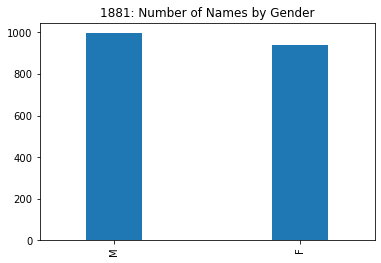

In [491]:
names1881['sex'].value_counts().plot(kind='bar',width=.3,
                                     title='1881: Number of Names by Gender')

Transferring this code to the entire data set (1881-2010), we see an interesting change.

In [492]:
print(type(names['sex']=='F'))
female_rows = names[names['sex']=='F']
len(female_rows)/len(names)

<class 'pandas.core.series.Series'>


0.5937984982114806

<AxesSubplot:title={'center':'1881--2007: Number of Names by Gender'}>

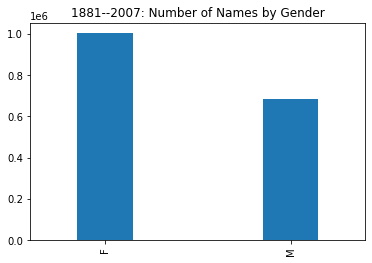

In [493]:
names['sex'].value_counts().plot(kind='bar',width=.3, 
                                 title='1881--2007: Number of Names by Gender')

We see the female rows occupy nearly 60% of the data, meaning that some time
after 1881 the diversity of female names overtook and greatly surpassed
that of male names.

#### Optional Exercise. 

Plot proportion of all names that were female names year by year to trace the 
year by year change.   Hint: create a sequence containing the numbers you need (proportion of female names in each year).  Then create a pandas DataFrame
`female_names_by_year` with two columns ('Year' and 'Proportion Female Names').  Then
do

```
female_names_by_year.plot('Year','Proportion Female Names')
```
Note that for this exercise a line 
connecting the proportion values for each year, which is the default plot type (kind = "line"), is a better choice than a bar plot (kind = "bar"). 

Optionally: Draw a horizontal line at 50% to help the viewer
see where the number of female names is greater than that of male names.
The births by year plotting example  with `matplotlib` below may help, since this involves
some knowledge of `matplotlib`.

An answer is provided several cells below.  

It is not the only possible answer.

The answer is surprising.  Female name diversity is not as simple as a continuously rising 
trend.

#### Solution 1

The following code is correct, and quite reasonable given what we've learned so far in this notebook but unnecessarily complicated.  We show a simpler solution
below which uses a previously undiscussed feature of `pandas`.

In [410]:
female_names = names[names['sex']=='F']
year_range = range(1881,2008)
result = []
for year in year_range:
    female_names_this_year = female_names[female_names['year'] == year]
    names_this_year =  names[names['year'] == year]
    result.append(len(female_names_this_year)/len(names_this_year))

Making a DataFrame so we can use its plotting methods

<AxesSubplot:xlabel='Year'>

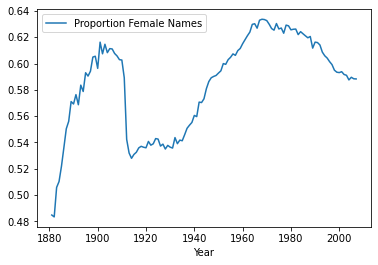

In [411]:
female_names_by_year = DataFrame(data = list(zip(year_range, result)),
                                 columns = ['Year','Proportion Female Names'])
female_names_by_year.plot('Year','Proportion Female Names')

<AxesSubplot:title={'center':'Percent Female Names by Year'}, xlabel='Year', ylabel='Percent Female Names'>

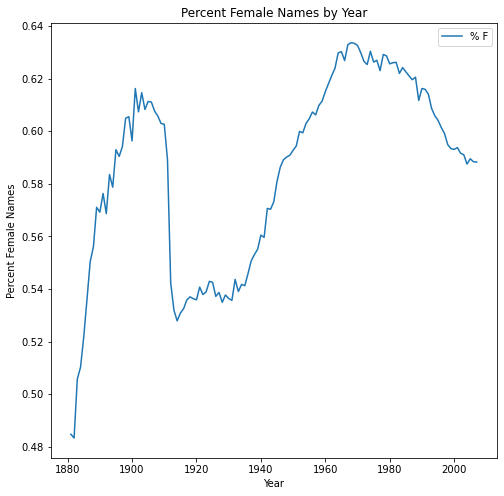

In [419]:
# Same plot with a few more bells and whistles
female_names_by_year.plot('Year','Proportion Female Names', ylabel='Percent Female Names',
                           xlabel='Year',title='Percent Female Names by Year',
                           label='% F',figsize=(8,8))

Adding The 50% line (bringing in a little knowledge of matplotlib):

<AxesSubplot:title={'center':'Percent Female Names by Year'}, xlabel='Year', ylabel='Percent Female Names'>

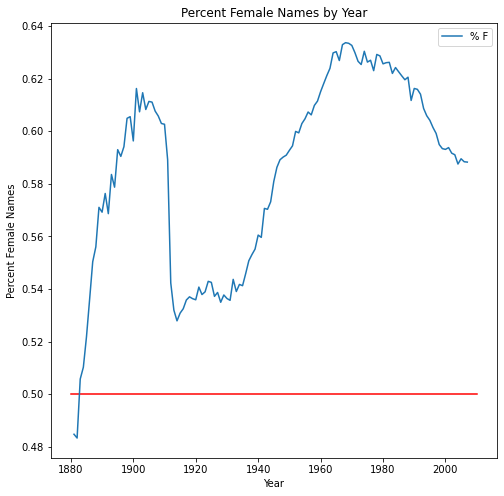

In [423]:
# Creating axis for plot and secondary line, so a line can be added
fig = plt.figure(1,figsize=(8,8))
ax1 = fig.add_subplot(111)
# Adding 50% line
ax1.plot(f_row.index,[.5 for _ in f_row.index],color='r',label='50%')
# Including axis labels, title, using ax1
female_names_by_year.plot('Year','Proportion Female Names', ylabel='Percent Female Names',
                           xlabel='Year',title='Percent Female Names by Year',
                           label='% F',ax=ax1)

#### Solution 2

A much simpler solution, using the `pandas` `crosstab` function:

In [526]:
# This version gives percentages
gender_counts_by_year = pd.crosstab(names['sex'],names['year'],normalize='columns')
gender_counts_by_year

# This version would give us counts rather than percentages
# margins = True includes "margins": an 'All' row  with totals for each col
# and an 'All' col with totals for each row.
# gender_counts_by_year = pd.crosstab(names['sex'],names['year'],margins=True)

year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,...,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
sex,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F,0.471,0.484755,0.48331,0.505758,0.510231,0.521796,0.535953,0.550358,0.556017,0.571042,0.569202,0.576316,0.568641,0.583539,0.578715,0.592981,0.590424,0.594122,0.6049,0.605523,0.596303,0.616239,0.607377,0.614636,0.608256,0.611324,0.611065,0.607649,0.605774,0.602934,...,0.626054,0.626195,0.621976,0.624211,0.622609,0.621049,0.619569,0.620546,0.6117,0.616253,0.615927,0.614074,0.608649,0.60588,0.604135,0.601416,0.599162,0.594922,0.593378,0.593084,0.593765,0.591646,0.59104,0.587513,0.589516,0.588384,0.588252,0.583214,0.581556,0.582127
M,0.529,0.515245,0.51669,0.494242,0.489769,0.478204,0.464047,0.449642,0.443983,0.428958,0.430798,0.423684,0.431359,0.416461,0.421285,0.407019,0.409576,0.405878,0.3951,0.394477,0.403697,0.383761,0.392623,0.385364,0.391744,0.388676,0.388935,0.392351,0.394226,0.397066,...,0.373946,0.373805,0.378024,0.375789,0.377391,0.378951,0.380431,0.379454,0.3883,0.383747,0.384073,0.385926,0.391351,0.39412,0.395865,0.398584,0.400838,0.405078,0.406622,0.406916,0.406235,0.408354,0.40896,0.412487,0.410484,0.411616,0.411748,0.416786,0.418444,0.417873


Note that `gender_counts_by_year` is a `DataFrame`; the index is the two genders.

It includes percentages (by column) because we passed `crosstab` the parameter
`normalize="columns"`.

This means `gender_counts_by_year.loc['F']` is a DataFrame row, 
that is a Series whose index is the column sequence.

In [527]:
f_row = gender_counts_by_year.loc['F']
f_row

year
1880    0.471000
1881    0.484755
1882    0.483310
1883    0.505758
1884    0.510231
          ...   
2006    0.588384
2007    0.588252
2008    0.583214
2009    0.581556
2010    0.582127
Name: F, Length: 131, dtype: float64

Since a Series has a plot method,  we have the following simple option,
which leaves out some plotting details.

<AxesSubplot:xlabel='year'>

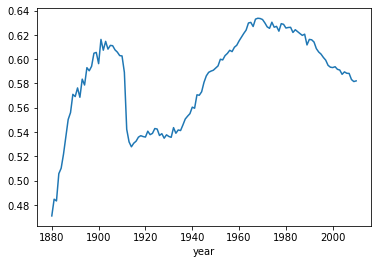

In [424]:
f_row.plot()

More satisfactory plotting code for soln 2 (with 50% line)

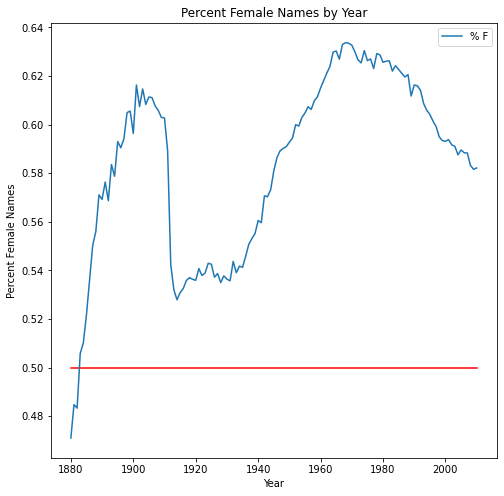

In [530]:
# Creating axis for plot and secondary line, so a line can be added
fig = plt.figure(1,figsize=(8,8))
ax1 = fig.add_subplot(111)
years = f_row.index
(num_years,) = f_row.shape
# Adding 50% line
point_five_line = .5 * np.ones(num_years)
ax1.plot(years,point_five_line,color='r',label='50%')
# Including axis labels, title, using ax1, adding legend
_splots = f_row.plot(ylabel='Percent Female Names',xlabel='Year',
                      title='Percent Female Names by Year',ax=ax1,label='% F',legend=True)

The lesson of solution 2: If what you're doing is a pretty standard piece of
data analysis, chances are good that `pandas` includes a simple way
of doing it.

Read some documentation to find potential tools.  Consult stackoverflow for code
snippets and pointers on where to look in the doumentation.

## Split/Apply/Combine: Pivot table  and crosstab

For this section make sure `names1881` is defined by evaluating the next cell

In [ ]:
names1881 = names[names['year']  == 1881]

In [494]:
namesfemale1881 = names1881[names1881['sex'] == 'F']
namesfemale1881['births'].mean()

98.03304904051173

We try to characterize this code in a general way, aiming to extract a reusable
strategy:

2. **Split step**: Line 1  **splits off** a group of rows, `namesfemale1881` using one of the possible values in `sex` column.  We'll call that column the **indexing** column.
3. **Apply step**: Line 2 **applies**  an **aggregation function**  ( `.mean()` ) to the `'births'` column of those rows; call `births` the **values** column.


In this example we performed the **split** step on one of
the possible values in the indexing column, then performed **apply step**
on one group of rows.
Frequently we want to perform these two steps for all possible values in the
indexing column.  

It would also be nice to **combine** the results in a new
Data Structure, indexed by the values that defined our groups  In our example,
the indexing column is `'sex'` with possible values `'F'` and `'M`', so
we'd like a new DataFrame with a single column containing the `'births'` means for those groups.

Summarizing: we need to split (using an index column), apply (applying
an aggregation function to a values column), and combine (into a DataFrame)
The way to perform all three steps at once is to use the **pivot table** method.

In [619]:
pt = names1881.pivot_table(values= 'births',index='sex',aggfunc='mean')

In [618]:
pt

,births
sex,
F,98.033049
M,101.051153


In fact, `mean` is the default aggregation function, and the first and second
arguments of the `.pivot_table()` method are always the values column and the index
column, so we get the same result by writing:

In [620]:
pt = names1881.pivot_table('births','sex')
pt

,births
sex,
F,98.033049
M,101.051153


It is worth emphasizing the importance of the **combine** step;
the `.pivot_table()` method combines its results into
a **DataFrame**. That means we can leverage all our knowledge
of how DataFrames work in using it.  One of the key takeaways about `pandas`
is that almost all the functions and methods that apply to DataFrames and Series
return either a DataFrame or a Series.  By understanding
the properties of what's returned, we can use it more effectively in
the next analytical step (such as plotting).

As desired, the values in the `'sex'` column now index the new DataFrame:

In [497]:
pt.index

Index(['F', 'M'], dtype='object', name='sex')

Note the original name of the indexing column has been preserved,
as the above output shows. It is stored in the `name` attribute 
of the DataFrame index:

In [321]:
pt.index.name

'sex'

As with any DataFrame, `.loc[ ]`  is used to access individual rows using names
from the index.

In [498]:
# Any expression containing this is a KeyError
# pt['sex']
# because 'sex' is not the name of a column in `pt`.
pt.loc['F']

births    98.033049
Name: F, dtype: float64

We have just found the **mean** female and male births for 1881.

Suppose we want **total births** instead of mean births.  It can still be done 
with a pivot table, but we need
to change our **aggregation function** from `mean` to `sum`.

In [507]:
names1881.pivot_table('births','sex',aggfunc='sum')

,births
sex,
F,91955
M,100748


So now we know the total number of male and female births in 1881 (at least
those accounted for our data sample).

Continuing along these lines, let's move back to the `names` DataFrame:
Suppose we want to find birth totals by gender and by year. That is,  we want a new DataFrame in which a single cell shows the total births for a particular gender for a particular year.  So want one of the following two **pivot tables**:

In [506]:
total_births = names.pivot_table('births','year', columns='sex', aggfunc='sum')
total_births2 = names.pivot_table('births','sex', columns='year', aggfunc='sum')

The difference between these two pivot table computatiomns lies entirely
in the combine step.

In creating the DataFrame `total_births`, both lines splits the rows of the `names` DataFrame into groups by year and sex, and apply `'sum'` to the `births` column in each group.

In line 1, The result are combined in a DataFrame with years as the index and columns
for `'F'` and '`M'` births.
In line 2, the resulting DataFrame has genders ('F' and 'M') as the index and
years as the columns.

In [51]:
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


Thus we find the 2006 birth totals with `.loc[]`:

In [55]:
total_births.loc[2006]

sex
F    1896468
M    2050234
Name: 2006, dtype: int64

And we access the female births data the way we access any column of any
DataFrame:

In [503]:
total_births['F']

year
1880      90993
1881      91955
1882     107851
1883     112322
1884     129021
         ...   
2006    1896468
2007    1916888
2008    1883645
2009    1827643
2010    1759010
Name: F, Length: 131, dtype: int64

In `total_births2`, the index and column roles are swapped:
The elements of the index are the genders, and the elements of the
years column are the columns.

In [ ]:
total_births2.tail()

year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,...,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
sex,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F,90993,91955,107851,112322,129021,133056,144538,145983,178631,178369,190377,185486,212350,212908,222923,233632,237924,234199,258771,233022,299873,239351,264079,261976,275375,291641,295301,318558,334277,347191,396416,418180,557939,624317,761376,983824,1044249,1081194,1157585,1130149,...,1663043,1521044,1457913,1467227,1457349,1464852,1532574,1531242,1604588,1659259,1666833,1692036,1669486,1682396,1719450,1714053,1737508,1779112,1843057,1897256,1874110,1842818,1807795,1784407,1757240,1751681,1739331,1765390,1772139,1813960,1798284,1794358,1824406,1833005,1843890,1896468,1916888,1883645,1827643,1759010
M,110493,100748,113687,104632,114445,107802,110785,101412,120857,110590,111026,101198,122038,112319,115775,117398,119575,112760,122703,106218,150554,106478,122660,119240,128129,132319,133159,146838,154339,163983,194198,225936,429926,512482,654746,848647,890142,925512,1013720,980215,...,1768325,1622178,1558562,1572415,1561378,1569098,1642747,1641143,1720781,1782388,1789568,1812642,1790670,1802735,1846162,1839442,1865113,1911858,1999840,2052070,2019018,1995760,1959712,1930363,1902100,1892700,1883571,1909676,1918267,1961702,1940498,1938941,1972439,1981557,1993285,2050234,2069242,2032310,1973359,1898382


The two pivot tables have equivalent data.  One
is the transpose of the other.

In [621]:
import numpy as np
np.all(total_births2.T == total_births)

True

Since `total_births` and `total_births2` contain essentially the same information,
let's summarize what we learned about the `.pivot-table()` method with
`total_births`.

How was `total_births` created?  By three steps

1. Splitting the rows of `name` into groups  (one for each year, gender pair).
2. Applying the aggregation function `sum` to each group
3. Combining the results into a single DataFrame `total_births`.

This is known as the split/apply/combine strategy.  

Below, we will explore the pandas function `groupby`
that performs just the first of these three steps.
First we cover the basic `pandas` tool for counting groups.

#### Cross tabulation

Compare `total_births2` with the output of `pd.crosstab`, which we use to get the joint distribution counts for two attributes; although the rows and columns are the same, the 
numbers are different.

In [62]:
total_births2.tail()

year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,...,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
sex,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F,90993,91955,107851,112322,129021,133056,144538,145983,178631,178369,190377,185486,212350,212908,222923,233632,237924,234199,258771,233022,299873,239351,264079,261976,275375,291641,295301,318558,334277,347191,...,1666833,1692036,1669486,1682396,1719450,1714053,1737508,1779112,1843057,1897256,1874110,1842818,1807795,1784407,1757240,1751681,1739331,1765390,1772139,1813960,1798284,1794358,1824406,1833005,1843890,1896468,1916888,1883645,1827643,1759010
M,110493,100748,113687,104632,114445,107802,110785,101412,120857,110590,111026,101198,122038,112319,115775,117398,119575,112760,122703,106218,150554,106478,122660,119240,128129,132319,133159,146838,154339,163983,...,1789568,1812642,1790670,1802735,1846162,1839442,1865113,1911858,1999840,2052070,2019018,1995760,1959712,1930363,1902100,1892700,1883571,1909676,1918267,1961702,1940498,1938941,1972439,1981557,1993285,2050234,2069242,2032310,1973359,1898382


In [513]:
crosstab_sex_year = pd.crosstab(names['sex'],names['year'])
crosstab_sex_year

year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,...,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
sex,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F,942,938,1028,1054,1172,1197,1282,1306,1474,1479,1534,1533,1661,1652,1702,1808,1825,1799,1975,1842,2226,1943,2042,2083,2166,2235,2220,2399,2434,2548,...,12178,12316,12057,12164,12497,12811,13247,13863,14534,15227,15461,15603,15792,15745,15751,15887,16154,16590,16935,17649,17962,18073,18418,18811,19164,20028,20520,20416,20123,19698
M,1058,997,1099,1030,1125,1097,1110,1067,1177,1111,1161,1127,1260,1179,1239,1241,1266,1229,1290,1200,1507,1210,1320,1306,1395,1421,1413,1549,1584,1678,...,7274,7352,7328,7323,7575,7817,8134,8477,9226,9482,9641,9806,10154,10242,10321,10529,10807,11296,11605,12109,12289,12474,12744,13207,13344,14011,14363,14590,14479,14140


In [512]:
crosstab_sex_year[1880]['F']

942

What does 

```
crosstab_sex_year[1880]['F']
```

mean?

It represents how many times the `names` DataFrame 
pairs 1880 in the `'year'` column with 'F' in
the `'sex'` column, and in `names`, that amounts to computing how many
distinct female names there were in 1880.

In this example `pd.crosstab` combined two columns of the `names` DataFrame
to  compute the crosstab DataFrame `crosstab_sex_year`.
In general, `pd.crosstab` takes any two sequences of equal length and
computes how many times unique pairings  occur.  

```
[1,0,1,0,0,1,1]
[b,b,b,a,b,a,a]
```
For example, in the two arrays seen here, a `1` from the first sequence is paired with a `b` from the second twice.  The results are summarized in the cross-tabulation DataFrame. 

In [508]:
pd.crosstab(np.array([1,0,1,0,0,1,1]),np.array(['b','b','b','a','b','a','a']))

col_0,a,b
row_0,,
0,1,2
1,2,2


If the two sequences are columns from a DataFrame, then the counts tell us how many
rows contain each possible pairing of values.  So each pair of values defines
a group of rows (the rows with `'year'` 1881 and `'sex'` 'F', for example, in `names`).

In lieu of just counting the rows in a group,  we can also use `crosstab` to apply a different aggregation operation to the group. 

For example we can use `crosstab` to
recreate `total_births2`, the DataFrame we created
above with `pivot_table`.  Here is the DataFrame we created with `pivot_table`.

In [77]:
total_births2

year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,...,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
sex,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F,90993,91955,107851,112322,129021,133056,144538,145983,178631,178369,190377,185486,212350,212908,222923,233632,237924,234199,258771,233022,299873,239351,264079,261976,275375,291641,295301,318558,334277,347191,...,1666833,1692036,1669486,1682396,1719450,1714053,1737508,1779112,1843057,1897256,1874110,1842818,1807795,1784407,1757240,1751681,1739331,1765390,1772139,1813960,1798284,1794358,1824406,1833005,1843890,1896468,1916888,1883645,1827643,1759010
M,110493,100748,113687,104632,114445,107802,110785,101412,120857,110590,111026,101198,122038,112319,115775,117398,119575,112760,122703,106218,150554,106478,122660,119240,128129,132319,133159,146838,154339,163983,...,1789568,1812642,1790670,1802735,1846162,1839442,1865113,1911858,1999840,2052070,2019018,1995760,1959712,1930363,1902100,1892700,1883571,1909676,1918267,1961702,1940498,1938941,1972439,1981557,1993285,2050234,2069242,2032310,1973359,1898382


And here is the same DataFrame using `crosstab`.

In [78]:
# Specify sum as the aggregation function
# and births as the numerical value column for sum to apply to
ct_table = pd.crosstab(names['sex'],names['year'], values= names['births'],aggfunc='sum')
ct_table

year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,...,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
sex,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F,90993,91955,107851,112322,129021,133056,144538,145983,178631,178369,190377,185486,212350,212908,222923,233632,237924,234199,258771,233022,299873,239351,264079,261976,275375,291641,295301,318558,334277,347191,...,1666833,1692036,1669486,1682396,1719450,1714053,1737508,1779112,1843057,1897256,1874110,1842818,1807795,1784407,1757240,1751681,1739331,1765390,1772139,1813960,1798284,1794358,1824406,1833005,1843890,1896468,1916888,1883645,1827643,1759010
M,110493,100748,113687,104632,114445,107802,110785,101412,120857,110590,111026,101198,122038,112319,115775,117398,119575,112760,122703,106218,150554,106478,122660,119240,128129,132319,133159,146838,154339,163983,...,1789568,1812642,1790670,1802735,1846162,1839442,1865113,1911858,1999840,2052070,2019018,1995760,1959712,1930363,1902100,1892700,1883571,1909676,1918267,1961702,1940498,1938941,1972439,1981557,1993285,2050234,2069242,2032310,1973359,1898382


It is somewhat a matter of taste which method to use when `crosstab` and
`pivot_table` can create the same DataFrame, but the general convention
is that it is clearer to use `pivot_table`, the more specific tool, to
create what most people know as a pivot table.

## Plotting

All data frames have a `plot` method; for
a simple DataFrame like a pivot table
the the `plot` method draws a very simple picture. 

Consider plotting `total_births`, the pivot table created in a previous
section.  Here's the DataFrame.  Note the index and the two columns:

In [ ]:
total_births

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
...,...,...
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310


And here is the plot, which puts the index on the x-axis and plots the two columns
as separate line plots.

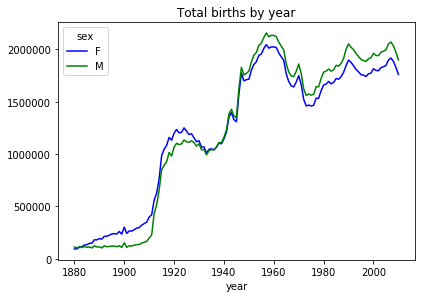

In [ ]:
from matplotlib import pyplot as plt
ax = total_births.plot(title='Total births by year') 
#plt.show()

## Alternative plotting script

The above graph is great and often what we want is just to take a quick look at the relationships in the data, and a data frame plot will do exactly the right thing with no customization.  It's helpful to know that `pandas` is using a Python package called `matplotlib` to draw the graph above, and we can do the same ourselves, with a lot more lines of code, but also with a lot more customization.

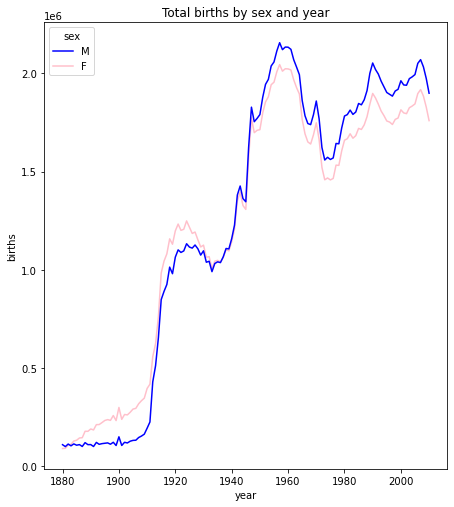

In [79]:
import matplotlib.pyplot as plt
fig = plt.figure(1,figsize=(8,8))
ax1 = fig.add_subplot(111)
fig.subplots_adjust(top=0.9,left=0.2)
ax1.set_ylabel('births')

ax1.set_xlabel('year')
(p1,) = ax1.plot(total_births.index,total_births['F'],color='pink',label='F')
(p2, ) = ax1.plot(total_births.index,total_births['M'],color='blue',label='M')
ax1.set_title('Total births by sex and year')
    
ax1.legend((p2,p1),('M','F'),loc='upper left',title='sex')
plt.show()

The basic arguments of the `matplotlib.plot(...)` function are `x` and `y`
which should be two sequences of the same length giving the x- and y- 
coordinates respectively of the plot. We can specify plot attributes like line
style, color, and label (for use in the legend) for each line plotted. 

There are also other plot functions which could provide alternative views of the 
relationships.

For example, we could do this as a bar plot.  Again

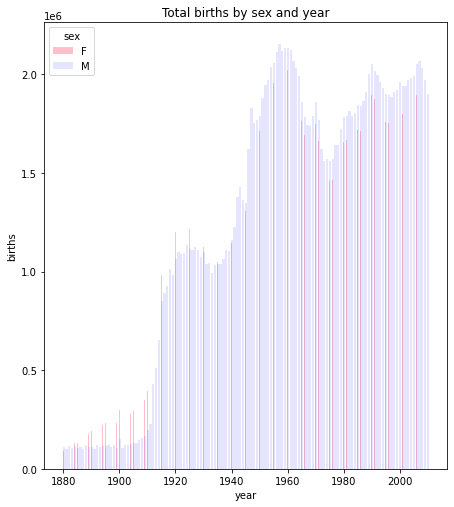

In [97]:
import matplotlib.pyplot as plt
fig = plt.figure(1,figsize=(8,8))
ax1 = fig.add_subplot(111)
fig.subplots_adjust(top=0.9,left=0.2)
ax1.set_ylabel('births')

ax1.set_xlabel('year')
width=.1
ax1.bar(total_births.index,total_births['F'],color='pink',label='F',width=width)
ax1.bar(total_births.index+width,total_births['M'],color='blue',label='M',alpha=.1)
ax1.set_title('Total births by sex and year')
    
ax1.legend(loc='upper left',title='sex')
plt.show()

# Complaints: a new dataset

We're going to use a new dataset here, to demonstrate how to deal with larger datasets.
And to think about how to apply what we've learned to a dataset with
few numerical columns.

The next cell provides a URL for a subset of the of 311 service requests from [NYC Open Data](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). 

In [324]:
import os.path
#How to break up long strings into multiline segments
#Note the use of "line continued" character \
data_url = 'https://raw.githubusercontent.com/gawron/python-for-social-science/master/'\
'pandas/datasets/311-service-requests.csv'

In [325]:
data_url

'https://raw.githubusercontent.com/gawron/python-for-social-science/master/pandas/datasets/311-service-requests.csv'

In [326]:
import pandas as pd
# Some columns are of mixed types.  This is OK.  But we have to set 
# low_memory=False
complaints = pd.read_csv(data_url,low_memory=False)

In [327]:
complaints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111069 entries, 0 to 111068
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      111069 non-null  int64  
 1   Created Date                    111069 non-null  object 
 2   Closed Date                     60270 non-null   object 
 3   Agency                          111069 non-null  object 
 4   Agency Name                     111069 non-null  object 
 5   Complaint Type                  111069 non-null  object 
 6   Descriptor                      110613 non-null  object 
 7   Location Type                   79022 non-null   object 
 8   Incident Zip                    98807 non-null   object 
 9   Incident Address                84441 non-null   object 
 10  Street Name                     84432 non-null   object 
 11  Cross Street 1                  84728 non-null   object 
 12  Cross Street 2  

Note that the `df.info()` summary shows how many non-null values there are in each column,
so that you can see there are some columns with very few meaningful entries.

You can see null-entries in the first 5 rows: They are the entries printed out as `NaN`.

`NaN` is short for "Not a Number".  It is the standard representation of an undefined result for a numerical calculation.  Here it is being used to mean "No data entered here";
`NaN` is very commonly used with this meaning in pandas, even in columns that do not have a numerical type; we could, alternatively,  use Python `None` for this purpose.

In [328]:
complaints[:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349.0,201984.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,WEST 171 STREET,WEST 172 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/31/2013 10:00:24 AM,10/31/2013 02:39:42 AM,12 MANHATTAN,MANHATTAN,1001088.0,246531.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,COLUMBUS AVENUE,AMSTERDAM AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:56:23 AM,10/31/2013 02:21:10 AM,07 MANHATTAN,MANHATTAN,989730.0,222727.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,LENOX AVENUE,ADAM CLAYTON POWELL JR BOULEVARD,NaN,NaN,BLOCKFACE,NEW YORK,NaN,NaN,Pending,11/30/2013 01:53:44 AM,10/31/2013 01:59:54 AM,10 MANHATTAN,MANHATTAN,998815.0,233545.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


# 2.2 Selecting columns and rows

As before we can select a column, by indexing with the name of the column:

In [253]:
complaints['Complaint Type']

0         Noise - Street/Sidewalk
1                 Illegal Parking
2              Noise - Commercial
3                 Noise - Vehicle
4                          Rodent
                   ...           
111064    Maintenance or Facility
111065            Illegal Parking
111066    Noise - Street/Sidewalk
111067         Noise - Commercial
111068           Blocked Driveway
Name: Complaint Type, Length: 111069, dtype: object

As above we select rows by constructing Boolean Series:

In [258]:
nypd_bool = (complaints['Agency'] == 'NYPD')
nypd_bool[:10]

0     True
1     True
2     True
3     True
4    False
5     True
6     True
7     True
8     True
9     True
Name: Agency, dtype: bool

We construct a sub frame that has only Police Department complaints.

In [259]:
nypd_df = complaints[nypd_bool]

But there are 20 kinds of PD complaints in this data.

In [275]:
complaint_set = set(nypd_df['Complaint Type'].astype(str))
complaint_set

{'Animal Abuse',
 'Bike/Roller/Skate Chronic',
 'Blocked Driveway',
 'Derelict Vehicle',
 'Disorderly Youth',
 'Drinking',
 'Graffiti',
 'Homeless Encampment',
 'Illegal Fireworks',
 'Illegal Parking',
 'Noise - Commercial',
 'Noise - House of Worship',
 'Noise - Park',
 'Noise - Street/Sidewalk',
 'Noise - Vehicle',
 'Panhandling',
 'Posting Advertisement',
 'Traffic',
 'Urinating in Public',
 'Vending'}

So we limit it further:

In [262]:
il_df = nypd_df[nypd_df['Complaint Type'] == 'Illegal Parking']

More constraints means progressively smaller DataFrames:

In [266]:
(len(complaints), len(nypd_df), len(il_df))

(111069, 15295, 3343)

### Attribute syntax versus indexing syntax

Note that columns can also be specified using instance/attribute syntax, as in:

In [276]:
complaints.Agency

0          NYPD
1          NYPD
2          NYPD
3          NYPD
4         DOHMH
          ...  
111064      DPR
111065     NYPD
111066     NYPD
111067     NYPD
111068     NYPD
Name: Agency, Length: 111069, dtype: object

But also note that doesnt work for the column name `Complaint Type`; because this has a space,
trying to use it as an attribute raises a `SyntaxError`: No Python name can contain
a space; that includes attribute names.

In [279]:
complaints.Complaint Type

SyntaxError: invalid syntax (2805497044.py, line 1)

So the general Python syntax for indexing a container (square bracket syntax) 

```
complaints['Complaint Type']
```

is the one to remember.

The indexing syntax is also the one that extends to accommodate
selection of multiple columns, using the fancy-indexing convention from `numpy`
(index via an arbitrary sequence of indices).

In [ ]:
complaints[['Complaint Type', 'Borough']][:10]

,Complaint Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
5,Noise - Commercial,QUEENS
6,Blocked Driveway,QUEENS
7,Noise - Commercial,QUEENS
8,Noise - Commercial,MANHATTAN
9,Noise - Commercial,BROOKLYN


Narrowing down the set of columns is a common step, especially important
when performing further analytical caulculations like pivot tables.

### Using crosstab

**Complaints Problem A**: For each complaint type, find its frequency in each borough.

This is a cross-tabulation question: We use `crosstab` to get the joint distribution counts for  two attributes.  

In [290]:
pd.crosstab(complaints['Agency'],complaints['Borough'])

Borough,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,Unspecified
Agency,,,,,,
3-1-1,0,8,11,12,1,60
CHALL,0,0,0,0,0,77
COIB,0,0,0,0,0,1
DCA,155,357,358,284,36,215
DEP,791,2069,3419,1916,690,12
DFTA,4,5,3,3,0,7
DHS,6,31,54,8,0,2
DOB,358,775,477,1257,147,0
DOE,17,26,24,15,7,8


**Elaboration of Complaints Problem A**:  For each complaint type, find its frequency in each borough. 
Also give the total number of complaints by borough and by complaint type.

In [329]:
ct_agency_borough = pd.crosstab(complaints['Agency'],complaints['Borough'],margins=True)
ct_agency_borough

Borough,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,Unspecified,All
Agency,,,,,,,
3-1-1,0,8,11,12,1,60,92
CHALL,0,0,0,0,0,77,77
COIB,0,0,0,0,0,1,1
DCA,155,357,358,284,36,215,1405
DEP,791,2069,3419,1916,690,12,8897
DFTA,4,5,3,3,0,7,22
DHS,6,31,54,8,0,2,101
DOB,358,775,477,1257,147,0,3014
DOE,17,26,24,15,7,8,97


Now `ct_agency_borough` contains both an `'All'` column (containing the
sum of the values in each row) and an `'All'` row (containing the sum of
the values for each column).

Note that as long as there are no rows missing an `'Agency'` or `'Borough'` (there aren't), then `ct_agency_borough['All']['All']` is the total number of rows in `complaints`.

In [330]:
print(len(complaints))
print(ct_agency_borough['All']['All'])

111069
111069


Here is the transpose of the above DataFrame.  
In other words, the answer to the query: For each borough, find the frequency of its complaints for each complaint type.

In [291]:
pd.crosstab(complaints['Borough'],complaints['Complaint Type'])

Complaint Type,APPLIANCE,Adopt-A-Basket,Agency Issues,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,BEST/Site Safety,Beach/Pool/Sauna Complaint,...,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment
Borough,,,,,,,,,,,,,,,,,,,,,
BRONX,108,0,0,40,162,0,17,17,12,0,...,8,2,20,23,17,15,13,278,0,0
BROOKLYN,175,0,0,125,0,4,15,29,16,6,...,10,12,61,35,8,31,28,517,1,0
MANHATTAN,89,3,0,203,2,2,23,60,18,0,...,11,10,8,119,46,21,26,961,1,0
QUEENS,67,0,0,76,0,0,16,30,5,1,...,12,6,29,49,13,53,12,552,0,1
STATEN ISLAND,6,0,0,15,0,2,13,7,1,0,...,0,0,25,3,6,10,10,326,0,0
Unspecified,0,0,174,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,2,0,0


**Complaints Problem B**:  What's the noisiest borough? A little preprocessing is required.

In [593]:
# Apply a function that returns True if a string starts with 'noise'
# to every element of the Complaint Type column, producing a Boolean Series
# Roughly equivalent to 
# boolean_series = pd.Series([ct.startswith('Noise') 
#                             for ct in complaints['Complaint Type']])
boolean_series = complaints['Complaint Type'].apply(lambda x: x.startswith('Noise'))
complaints_noise = complaints[boolean_series]
complaints_noise[:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,WEST 171 STREET,WEST 172 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/31/2013 10:00:24 AM,10/31/2013 02:39:42 AM,12 MANHATTAN,MANHATTAN,1001088.0,246531.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,COLUMBUS AVENUE,AMSTERDAM AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:56:23 AM,10/31/2013 02:21:10 AM,07 MANHATTAN,MANHATTAN,989730.0,222727.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
5,26592370,10/31/2013 01:46:52 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Club/Bar/Restaurant,11372,37 AVENUE,37 AVENUE,84 STREET,85 STREET,NaN,NaN,BLOCKFACE,JACKSON HEIGHTS,NaN,Precinct,Open,10/31/2013 09:46:52 AM,NaN,03 QUEENS,QUEENS,1016948.0,212540.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.749989,-73.881988,"(40.7499893014072, -73.88198770727831)"
7,26595195,10/31/2013 01:44:19 AM,10/31/2013 01:58:49 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11417,137-09 CROSSBAY BOULEVARD,CROSSBAY BOULEVARD,PITKIN AVENUE,VAN WICKLEN ROAD,NaN,NaN,ADDRESS,OZONE PARK,NaN,Precinct,Closed,10/31/2013 09:44:19 AM,10/31/2013 01:58:49 AM,10 QUEENS,QUEENS,1027776.0,184076.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.671816,-73.843092,"(40.67181584567338, -73.84309181950769)"


So what's the noisiest borough?  The answer is no surprise to those who've been in NYC.

In [338]:
ct_noise = pd.crosstab(complaints_noise['Borough'],complaints_noise['Complaint Type'],
                       margins=True)
ct_noise.sort_values(by = 'All',ascending=False)

Complaint Type,Noise,Noise - Commercial,Noise - Helicopter,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,All
Borough,,,,,,,,
All,3321,2578,99,67,191,1928,750,8934
MANHATTAN,1848,1140,66,16,91,917,255,4333
BROOKLYN,767,775,23,23,60,456,237,2341
QUEENS,418,451,9,15,27,226,130,1276
BRONX,168,136,1,11,9,292,102,719
STATEN ISLAND,115,76,0,2,4,36,25,258
Unspecified,5,0,0,0,0,1,1,7


**Complaints problem C**

Find the complaint counts for three agences ('DOT', "DOP", 'NYPD').

First Produce a DataFrame containing only the three agencies DT, DOP and NYPD.  This part is easy.

In [587]:
pt00 = complaints[complaints.Agency.isin(['DOT', "DOP", 'NYPD'])]

The frame `pt00` now restricts us to three agencies.

Second, use `pt00` to create a DataFrame or Series
whose index is the complaint types
and whose three columns are the Three Agencies.
Each  cell should contain the count of the complaint
type of that row and the agency of that column.
For example, the number in the `'Animal Abuse'` row in
the `'NYPD'` column should be the number of NYPD complaints  about
animal abuse (which happens to be 164).

A pause to think about this.

In [591]:
three = ['DOT', "DOP", 'NYPD']
pt00 = complaints[complaints.Agency.isin(three)]
pd.crosstab(pt00['Complaint Type'], pt00['Agency'])

Agency,DOP,DOT,NYPD
Complaint Type,,,
Agency Issues,0,20,0
Animal Abuse,0,0,164
Bike Rack Condition,0,7,0
Bike/Roller/Skate Chronic,0,0,32
Blocked Driveway,0,0,4590
Bridge Condition,0,20,0
Broken Muni Meter,0,2070,0
Bus Stop Shelter Placement,0,14,0
Compliment,0,1,0


In thinking about how we used `pd.crosstab` to solve this problem, it's worth considering
an obvious (though slightlhy awkward) alternative: doing this with a pivot table.

Pivot_table construction begins
the same way cross-tabulation does: it splits the rows into
groups such that each group contains all the
rows for one agency/compliant type say, 'NYPD'/'Anmal Abuse';
it then applies the aggregation function to each group.

There is an aggregation function`'count'` which does we want.
It simply computes the number rows in each group.  

There is one wrinkle, and this
is the awkward part: the pivot table function needs an argument
for the `values` column (in other aggregation operations
this argument gives the numerical values to which the aggregation operation applies).  When the aggregation operation is `'count'` **any** valid column will serve.  

So we pick one at random, say `"Status"`.  The result is almost exactly
what we computed with `crosstab`, though with slightly
more obscure code:

In [271]:
three = ['DOT', "DOP", 'NYPD']
pt00 = complaints[complaints.Agency.isin(three)]
pt0 = pt00.pivot_table(values='Status', index='Complaint Type' , 
                       columns = 'Agency', aggfunc='count')
pt0                   

Agency,DOP,DOT,NYPD
Complaint Type,,,
Agency Issues,NaN,20.0,NaN
Animal Abuse,NaN,NaN,164.0
Bike Rack Condition,NaN,7.0,NaN
Bike/Roller/Skate Chronic,NaN,NaN,32.0
Blocked Driveway,NaN,NaN,4590.0
Bridge Condition,NaN,20.0,NaN
Broken Muni Meter,NaN,2070.0,NaN
Bus Stop Shelter Placement,NaN,14.0,NaN
Compliment,NaN,1.0,NaN


The difference is the appearance of `NaN` in all those places
where there were no rows in the group to count.

All in all, it is an improvement in clarity and informativeness to use crosstab for
this task.  As we shall see below, there are cases where cross tabulation
can be extended, using other aggregation operations, to build
DataFrames that are more easily understood as pivot_tables. The rule
of thumb is to use cross tabulation where the operation
applied to groups is counting.

Summarizing: this is the kind of problem to use cross-tabulation for.  It
involves counting.  

It is possible to we call the `.pivot_table()` method on `complaints`,
grouping by Complaint Type and Agency pairs 
using  `'count'` as the aggregation operation to get the same
result, but this is not best practice.  

## Using groupby

Grouping is the first of the three operations in the split/apply/combine strategy.

Let's use a new dataset to illustrate, because it has some very natural
groupings.

In [642]:
nba_file_url = 'https://gawron.sdsu.edu/python_for_ss/course_core/data/nba.csv'
nba_df = pd.read_csv(nba_file_url)

Each row contains information about one current player. The team rosters are listed in alphabetical order of team name, with the players in alphabetical order by name
within the teams.

In [643]:
nba_df[:5]

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


We are going to use it to find out about team salaries, height by position
and weight by position.

We group the rows by team and then show the alphabetically first player in each team.

In [555]:
gt = nba_df.groupby('Team')
# First member of each group
gt.first()

,Name,Number,Position,Age,Height,Weight,College,Salary,HeightFloats
Team,,,,,,,,,
Atlanta Hawks,Kent Bazemore,24.0,SF,26.0,6-5,201.0,Old Dominion,2000000.0,6.416667
Boston Celtics,Avery Bradley,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,6.166667
Brooklyn Nets,Bojan Bogdanovic,44.0,SG,27.0,6-8,216.0,Oklahoma State,3425510.0,6.666667
Charlotte Hornets,Nicolas Batum,5.0,SG,27.0,6-8,200.0,Virginia Commonwealth,13125306.0,6.666667
Chicago Bulls,Cameron Bairstow,41.0,PF,25.0,6-9,250.0,New Mexico,845059.0,6.750000
Cleveland Cavaliers,Matthew Dellavedova,8.0,PG,25.0,6-4,198.0,Saint Mary's,1147276.0,6.333333
Dallas Mavericks,Justin Anderson,1.0,SG,22.0,6-6,228.0,Virginia,1449000.0,6.500000
Denver Nuggets,Darrell Arthur,0.0,PF,28.0,6-9,235.0,Kansas,2814000.0,6.750000
Detroit Pistons,Joel Anthony,50.0,C,33.0,6-9,245.0,UNLV,2500000.0,6.750000


Next we use the grouping object to retrieve all rows for a particular group:

In [263]:
# A particular group
gt.get_group('Utah Jazz')

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
442,Trevor Booker,Utah Jazz,33.0,PF,28.0,6-8,228.0,Clemson,4775000.0
443,Trey Burke,Utah Jazz,3.0,PG,23.0,6-1,191.0,Michigan,2658240.0
444,Alec Burks,Utah Jazz,10.0,SG,24.0,6-6,214.0,Colorado,9463484.0
445,Dante Exum,Utah Jazz,11.0,PG,20.0,6-6,190.0,NaN,3777720.0
446,Derrick Favors,Utah Jazz,15.0,PF,24.0,6-10,265.0,Georgia Tech,12000000.0
447,Rudy Gobert,Utah Jazz,27.0,C,23.0,7-1,245.0,NaN,1175880.0
448,Gordon Hayward,Utah Jazz,20.0,SF,26.0,6-8,226.0,Butler,15409570.0
449,Rodney Hood,Utah Jazz,5.0,SG,23.0,6-8,206.0,Duke,1348440.0
450,Joe Ingles,Utah Jazz,2.0,SF,28.0,6-8,226.0,NaN,2050000.0
451,Chris Johnson,Utah Jazz,23.0,SF,26.0,6-6,206.0,Dayton,981348.0


Note that the benefit of the grouping object is that it makes various 
group member by group member operatations operations easrier.

If all we were interested in was constructing DataFrames limited to one team,
we could just as easily have been done that with:

In [626]:
nba_df[nba_df['Team'] == 'Utah Jazz']

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,HeightFloats
442,Trevor Booker,Utah Jazz,33.0,PF,28.0,6-8,228.0,Clemson,4775000.0,6.666667
443,Trey Burke,Utah Jazz,3.0,PG,23.0,6-1,191.0,Michigan,2658240.0,6.083333
444,Alec Burks,Utah Jazz,10.0,SG,24.0,6-6,214.0,Colorado,9463484.0,6.500000
445,Dante Exum,Utah Jazz,11.0,PG,20.0,6-6,190.0,NaN,3777720.0,6.500000
446,Derrick Favors,Utah Jazz,15.0,PF,24.0,6-10,265.0,Georgia Tech,12000000.0,6.833333
447,Rudy Gobert,Utah Jazz,27.0,C,23.0,7-1,245.0,NaN,1175880.0,7.083333
448,Gordon Hayward,Utah Jazz,20.0,SF,26.0,6-8,226.0,Butler,15409570.0,6.666667
449,Rodney Hood,Utah Jazz,5.0,SG,23.0,6-8,206.0,Duke,1348440.0,6.666667
450,Joe Ingles,Utah Jazz,2.0,SF,28.0,6-8,226.0,NaN,2050000.0,6.666667
451,Chris Johnson,Utah Jazz,23.0,SF,26.0,6-6,206.0,Dayton,981348.0,6.500000


But suppose we were interested in getting various averages by team. Suppose
for example we were interested in average team height and average team salary.
Then it would be convenient to use our team grouping instance and do:

In [634]:
print(gt['Age'].mean().sort_values(ascending=False))
print()
print(gt['Salary'].mean().sort_values(ascending=False))

Team
San Antonio Spurs         31.600000
Dallas Mavericks          29.733333
Cleveland Cavaliers       29.533333
Los Angeles Clippers      29.466667
Miami Heat                28.933333
Memphis Grizzlies         28.388889
Atlanta Hawks             28.200000
Washington Wizards        27.866667
Golden State Warriors     27.666667
Los Angeles Lakers        27.533333
Chicago Bulls             27.400000
Oklahoma City Thunder     27.066667
New York Knicks           27.000000
New Orleans Pelicans      26.894737
Houston Rockets           26.866667
Sacramento Kings          26.800000
Indiana Pacers            26.400000
Minnesota Timberwolves    26.357143
Detroit Pistons           26.200000
Charlotte Hornets         26.133333
Toronto Raptors           26.133333
Phoenix Suns              25.866667
Denver Nuggets            25.733333
Brooklyn Nets             25.600000
Orlando Magic             25.071429
Portland Trail Blazers    25.066667
Boston Celtics            24.733333
Philadelphia 76ers     

Grouping also gets more interesting when it's done by more than one attribute at a time Let's try  grouping by team and position.

In basketball each team puts five players
on the court at any given time.   Although 
the specialized roles of the players on the court are changing,
classically a player plays one of five positions: 

1. Point Guard (PG)
2. Shooting Guard (SG)
3. Small Forward (SF)
4. Power Forward (PF)
5. Center (C).

This data set assigns each player to one of these five positions. 
A team will typically have multiple players assigned to any
given position.

In [627]:
gtp = nba_df.groupby(['Team','Position'])
# Show the first entry for each team/position pair
gtp.first()

Name  Number   Age Height  Weight               College      Salary  HeightFloats
Team               Position                                                                                               
Atlanta Hawks      C               Al Horford    15.0  30.0   6-10   245.0               Florida  12000000.0      6.833333
                   PF          Kris Humphries    43.0  31.0    6-9   235.0             Minnesota   1000000.0      6.750000
                   PG         Dennis Schroder    17.0  22.0    6-1   172.0           Wake Forest   1763400.0      6.083333
                   SF           Kent Bazemore    24.0  26.0    6-5   201.0          Old Dominion   2000000.0      6.416667
                   SG        Tim Hardaway Jr.    10.0  24.0    6-6   205.0              Michigan   1304520.0      6.500000
...                                       ...     ...   ...    ...     ...                   ...         ...           ...
Washington Wizards C            Marcin Gortat    13.0  32.0   6-11   240.0  North Carolina State  11217391.0      6.916667
                   PF             Drew Gooden    90.0  34.0   6-10   250.0                Kansas   3300000.0      6.833333
                   PG          Ramon Sessions     7.0  30.0    6-3   190.0                Nevada   2170465.0      6.250000
                   SF            Jared Dudley     1.0  30.0    6-7   225.0        Boston College   4375000.0      6.583333
                   SG           Alan Anderson     6.0  33.0    6-6   220.0        Michigan State   4000000.0      6.500000

[149 rows x 8 columns]

`gtp_first` is a DataFrame with a **double index** (an index with two levels) so we can select an index member from the first level to get a set of rows.

The alphabetically first players on the Boston Celtics, by position.

In [544]:
#
gtp.first().loc['Boston Celtics']

,Name,Number,Age,Height,Weight,College,Salary
Position,,,,,,,
C,Kelly Olynyk,41.0,25.0,7-0,238.0,Gonzaga,2165160.0
PF,Jonas Jerebko,8.0,29.0,6-10,231.0,LSU,5000000.0
PG,Avery Bradley,0.0,25.0,6-2,180.0,Texas,7730337.0
SF,Jae Crowder,99.0,25.0,6-6,235.0,Marquette,6796117.0
SG,John Holland,30.0,27.0,6-5,205.0,Boston University,1148640.0


In [351]:
gtp.first().loc['Golden State Warriors']

,Name,Number,Age,Height,Weight,College,Salary
Position,,,,,,,
C,Andrew Bogut,12.0,31.0,7-0,260.0,Utah,13800000.0
PF,Draymond Green,23.0,26.0,6-7,230.0,Michigan State,14260870.0
PG,Stephen Curry,30.0,28.0,6-3,190.0,Davidson,11370786.0
SF,Harrison Barnes,40.0,24.0,6-8,225.0,North Carolina,3873398.0
SG,Leandro Barbosa,19.0,33.0,6-3,194.0,Belmont,2500000.0


To get to an individual player record (a row) you need to supply an index member from each level.

So the alphabetically first center on the Boston Celtics is:

In [545]:
gtp.first().loc[('Boston Celtics','C')]

Name       Kelly Olynyk
Number             41.0
Age                25.0
Height              7-0
Weight            238.0
College         Gonzaga
Salary        2165160.0
Name: (Boston Celtics, C), dtype: object

Now a `DataFrameGroupBy` instance is **not** a DataFrame or a Series, making `groupby`
one of the few commonly used `pandas` analysis methods that doesn't return either:

In [566]:
gtp

But one can do many of the things one does to a DataFrame to a `GroupByDataFrame`
instance.  For example, extract a column:

In [582]:
gtp['Salary']

Which yields a `SeriesGroupBy` instance. Which has many of the same methods
we saw for the DataFrameGroupBy instances above, including `.first()` and
`.get_group()`.

Instead of calling either of those, let's apply an aggregation function appropriate to this column:

In [533]:
salary_df = gtp['Salary'].mean()

This gets us a new Series, doubly indexed by team and position:

In [585]:
type(salary_df)

pandas.core.series.Series

In [538]:
salary_df.iloc[:49]

Team                   Position
Atlanta Hawks          C           7.585417e+06
                       PF          5.988067e+06
                       PG          4.881700e+06
                       SF          3.000000e+06
                       SG          2.607758e+06
Boston Celtics         C           2.450465e+06
                       PF          6.056987e+06
                       PG          4.974652e+06
                       SF          6.796117e+06
                       SG          2.107997e+06
Brooklyn Nets          C           1.031814e+07
                       PF          3.576205e+06
                       PG          2.915759e+06
                       SG          1.473351e+06
Charlotte Hornets      C           6.772240e+06
                       PF          4.685770e+06
                       PG          4.776152e+06
                       SF          6.331404e+06
                       SG          4.661406e+06
Chicago Bulls          C           1.042438e+07
        

In [534]:
salary_df.loc['Boston Celtics']

Position
C     2.450465e+06
PF    6.056987e+06
PG    4.974652e+06
SF    6.796117e+06
SG    2.107997e+06
Name: Salary, dtype: float64

In [586]:
salary_df.loc['Boston Celtics']['C']

2450465.0

Sample Interpretation: The Celtics pays their centers an average of 2.4 Million.

Now we can do things like the following.

Compare Golden State salaries  with Boston salaries position by position.

In [298]:
salary_df.loc['Boston Celtics']

Position
C     2.450465e+06
PF    6.056987e+06
PG    4.974652e+06
SF    6.796117e+06
SG    2.107997e+06
Name: Salary, dtype: float64

In [276]:
salary_df.loc['Golden State Warriors']

Position
C     6.541249e+06
PF    7.275312e+06
PG    8.457256e+06
SF    3.766367e+06
SG    6.316092e+06
Name: Salary, dtype: float64

In [300]:
salary_df.loc['Golden State Warriors'] > salary_df.loc['Boston Celtics']

Position
C      True
PF     True
PG     True
SF    False
SG     True
Name: Salary, dtype: bool

The Warriors pay more at every position but small forward (SF).

Each of these is a Series so in theory we can take the mean again:

In [401]:
salary_df = gtp['Salary'].mean()
print(f'{salary_df.loc["Boston Celtics"].mean():6,.2f}')
print(f'{salary_df.loc["Golden State Warriors"].mean():6,.2f}')
#salary_df.loc['Golden State Warriors'].mean())

4,477,243.37
6,471,255.35


But these numbers may not have the interpretation you think they do.

In order to get the right interpretation of the above numbers,
think about why the following numbers aren't the same.

In [641]:
salary_df2 = gt['Salary'].mean()
print(f'{salary_df2.loc["Boston Celtics"]:6,.2f}')
print(f'{salary_df2.loc["Golden State Warriors"]:6,.2f}')

4,181,504.86
5,924,599.80


Try answering the following questions.  Note.  You do not have to use `groupby` method in your answers.

1.  What is the average weight of Centers in the league? Which position is heavier on average, Center or Power Forward?
1.  What is the average height of Centers in the league? Which position is taller on average, Center or Power Forward?
3.  What position earns the highest salary on average?
4.  What colleges have supplied the most current NBA players?  How many colleges
have supplied only one NBA player?

#### Q1 What is the average weight of Centers in the league?

In [415]:
gp = nba_df.groupby('Position')
weight_by_position = gp['Weight'].mean()
# This is a Series
weight_by_position                  

Position
C     254.205128
PF    240.430000
PG    189.478261
SF    221.776471
SG    206.686275
Name: Weight, dtype: float64

Note  we have wandered into territory covered by the pivot function,
which is a trifle more convenient to use, if we're just answering Q1. 

In [514]:
nba_pt_wt = nba_df.pivot_table('Weight','Position')
# this is a DataFrame with one column
nba_pt_wt

,Weight
Position,
C,254.205128
PF,240.430000
PG,189.478261
SF,221.776471
SG,206.686275


In [360]:
#Q1
print(weight_by_position['C'])
#Q2
print(weight_by_position['C'] > weight_by_position['SF'])

254.2051282051282
True


#### Q2 What is the average height of Centers in the league?

It is a more challenging task to answer these same questions about heights.

This is because the entries in the height column are strings 
that need to be converted to numbers before a mean can be taken.

In [366]:
sample_height = nba_df['Height'].iloc[0]
sample_height

'6-2'

So we want to apply this function to every element of the Height Column.

In [396]:
def str_height_to_float_height(str_height):
    if not isinstance(str_height,str):
        # If, for example, it's already a float (especially a NaN), leave it
        return str_height
    (ft, inch) = [int(s) for s in str_height.split('-')]
    return ft + inch/12

sample_height_float = str_height_to_float_height(sample_height)
sample_height_float

6.166666666666667

The `pandas` DataFrame and Series method `apply` applies a function to each
row of `self` and returns the results as an instance
of the same class as `self` with the same index.

In the next cell we apply `str_height_to_float_height` 
to the Series `nba_df['Height']` and get back another Series.
We use it to make a new column.

In [397]:
nba_df['HeightFloats'] = nba_df['Height'].apply(str_height_to_float_height)
nba_df['HeightFloats']

0      6.166667
1      6.500000
2      6.416667
3      6.416667
4      6.833333
         ...   
453    6.250000
454    6.083333
455    7.250000
456    7.000000
457         NaN
Name: HeightFloats, Length: 458, dtype: float64

Now we do with this new column what we did with Weights.

In [398]:
height_by_position = gp['HeightFloats'].mean()
height_by_position

Position
C     6.941239
PF    6.809167
PG    6.202899
SF    6.632353
SG    6.461601
Name: HeightFloats, dtype: float64

In [560]:
#Height of centers
print(height_by_position['C'])
# Who's taller, centers or power forwards?
print(height_by_position['C'] > height_by_position['SF'])

6.941239316239316
True


Using a pivot table to answer these questions:

In [552]:
nba_pt_ht = nba_df.pivot_table('HeightFloats','Position')
print(nba_pt_ht)
print()
print(f"And the answer is: {nba_pt_ht.loc['C','HeightFloats']:.1f}")

          HeightFloats
Position              
C             6.941239
PF            6.809167
PG            6.202899
SF            6.632353
SG            6.461601

And the answer is: 6.9


The following might be a nice thing to do.  Turn the mean heights
back into normal-looking height strings.

In [413]:
def float_height_to_str(ft_height):
    if isinstance(ft_height,float) and np.isnan(ft_height):
        # If it's  a NaN, leave it alone
        return ft_height
    # np.floor returns an int (mathematically) but its type is still float
    (ft_int, inch_fl) = np.floor(ft_height), ft_height%1
    return str(round(ft_int)) + '-' + str(round(inch_fl * 12))

height_by_position.apply(float_height_to_str)

Position
C     6-11
PF    6-10
PG     6-2
SF     6-8
SG     6-6
Name: HeightFloats, dtype: object

#### Q3 What position earns the highest salary on average?

In [559]:
gp = nba_df.groupby('Position')
gp['Salary'].mean().sort_values(ascending=False).index[0]

'C'

Or

In [565]:
nba_df.pivot_table('Salary','Position')['Salary'].sort_values(ascending=False).index[0]

'C'

**Q4 What colleges have supplied the most current NBA players?**

Since there's no cross tabulation of multiple columns here, and the question
involves counting values that are  onfined to one column (`'College'`), this
question does not require either grouping or a pivot table.

The `'.value_counts()'` method does everything we need.

In [601]:
college_cts = nba_df['College'].value_counts()
college_cts[:5]

Kentucky          22
Duke              20
Kansas            18
North Carolina    16
UCLA              15
Name: College, dtype: int64

**Q4 (ctd.) How many colleges have supplied only one NBA player?**

We need to create a Series that contains the frequency of each count in `college_counts`.

Then we can retrieve the frequency for 1 NBA player.  That means using the
`.value_counts()` method on `college_cts`.  Since the values in the `college_ counts` Series are NBA player counts, applying `.value_counts()` again will produce a Series whose index is NBA player counts and whose values are the number of times each player count has occurred; in this case that means the number of colleges that have supplied that many NBA players.

For convenience, we'll sort the index of the resulting Series.

In [607]:
college_cts.value_counts().sort_index()

1     52
2     24
3     15
4      5
5      4
6      6
7      3
8      1
9      1
10     1
13     1
15     1
16     1
18     1
20     1
22     1
Name: College, dtype: int64

So 52 colleges have supplied exactly one NBA player; 24 have supplied 2; 15 have
supplied 3; and so one.

The expression for exactly the value we want is:

In [603]:
college_cts.value_counts().loc[1]

52

## Pivot tables versus grouping

There really isn't an advantage to using groupby for the pivot table examples
we saw before.  The `.groupby()` method or its equivalent is the first step in creating a pivot table; hence, we can always emulate  
the `.pivot_table()` method by grouping and then apply an aggregation function.

Here is how we'd do complaint type counting by agency with groupby.

In [292]:
three = ['DOT', "DOP", 'NYPD']
pt00 = complaints[complaints.Agency.isin(three)]
gta = pt00.groupby(['Agency','Complaint Type'])

To apply the aggregation function `count` we must still choose a column
and the choice of that column for counting is arbitrary

In [417]:
gta['Unique Key'].count()[:10]

Agency  Complaint Type            
DOP     Invitation                       1
        Request for Information          1
DOT     Agency Issues                   20
        Bike Rack Condition              7
        Bridge Condition                20
        Broken Muni Meter             2070
        Bus Stop Shelter Placement      14
        Compliment                       1
        Curb Condition                  66
        DOT Literature Request         123
Name: Unique Key, dtype: int64

Comparing the result with the column we chose before.

In [419]:
(gta['Unique Key'].count() == gta['Status'].count())[:10]

Agency  Complaint Type            
DOP     Invitation                    True
        Request for Information       True
DOT     Agency Issues                 True
        Bike Rack Condition           True
        Bridge Condition              True
        Broken Muni Meter             True
        Bus Stop Shelter Placement    True
        Compliment                    True
        Curb Condition                True
        DOT Literature Request        True
dtype: bool

Since the pivot function can perform the splitting, applying, and collecting
all in one step, it is good practice to prefer using the pivot table
function when all three steps of the split/applying/combining cycle
are needed.

Going by way of the `groupby` function is helpful for cases like the NBA data, when we we
wanted to access different properties of the same partition.

## Analysis: What's the most common complaint type?

First of all, this is a really easy question to answer! There's a `.value_counts()` method that we can use:

In [421]:
complaint_counts = complaints['Complaint Type'].value_counts()
complaint_counts

HEATING                           14200
GENERAL CONSTRUCTION               7471
Street Light Condition             7117
DOF Literature Request             5797
PLUMBING                           5373
                                  ...  
Municipal Parking Facility            1
Tunnel Condition                      1
DHS Income Savings Requirement        1
Stalled Sites                         1
X-Ray Machine/Equipment               1
Name: Complaint Type, Length: 165, dtype: int64

Since `complaints_counts` is a  Series (the complaint types are the index) ordered by number of complaints,  we can plot the numbers for the top complaint types, demonstrating visually what an outlier `Heating` is (Oh those NYC winters!).

<AxesSubplot:>

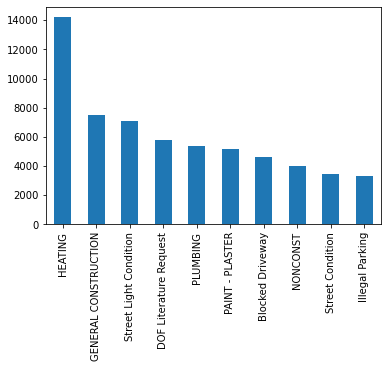

In [422]:
complaint_counts[:10].plot(kind='bar')

#### Exercise

Find the distribution of complaint Statuses.  That is, write
an expression that produces a DataFrame or Series whose index
is the seven possible complaint Statuses  and whose
values are the number of complaints with each Status.

The solution is given a few cells down.  

To help you check your solution, here are the seven complaint statuses.

In [161]:
set(complaints['Status'])

{'Assigned',
 'Closed',
 'Email Sent',
 'Open',
 'Pending',
 'Started',
 'Unassigned'}

#### Solution 1

In [164]:
sc = complaints['Status'].value_counts()
sc

Closed        57165
Open          43972
Assigned       6189
Pending        3165
Started         447
Email Sent      129
Unassigned        2
Name: Status, dtype: int64

### New Stocks dataset:  Doing stuff with Time

1.  Adding columns to enable new kinds of grouping.
2.  "Melting" different value columns into 1 value column (in order to set up a pivot).
3.  Centering and scaling data.

In [650]:
import pandas as pd
import os.path
import urllib.request 
import os.path
from matplotlib import pyplot as plt

url_dir = 'https://gawron.sdsu.edu/python_for_ss/course_core/data'
time1 = pd.read_csv(os.path.join(url_dir,'stocks.csv'))
time1

,Unnamed: 0,date,AA,GE,IBM,MSFT
0,0,1990-02-01 00:00:00,4.98,2.87,16.79,0.51
1,1,1990-02-02 00:00:00,5.04,2.87,16.89,0.51
2,2,1990-02-05 00:00:00,5.07,2.87,17.32,0.51
3,3,1990-02-06 00:00:00,5.01,2.88,17.56,0.51
4,4,1990-02-07 00:00:00,5.04,2.91,17.93,0.51
...,...,...,...,...,...,...
5467,5467,2011-10-10 00:00:00,10.09,16.14,186.62,26.94
5468,5468,2011-10-11 00:00:00,10.30,16.14,185.00,27.00
5469,5469,2011-10-12 00:00:00,10.05,16.40,186.12,26.96
5470,5470,2011-10-13 00:00:00,10.10,16.22,186.82,27.18


To get the idea of this data set try this:

**Plotting challenge**:  Plot IBM and GE stock prices for February.  Try to place the two plots
side by side.

Note: even though the values in the `'date'` column are strings, they've very well chosen strings
for our purposes.  Normal string sorting will reproduce chronological order.

There are no NaN  values in the data.

In [721]:
len(time1), len(time1.dropna())

(5472, 5472)

In [651]:
time_feb = time1[(time1['date'] >='1990-02-01 00:00:00') & (time1['date'] < '1990-03-01 00:00:00') ]

<AxesSubplot:xlabel='date'>

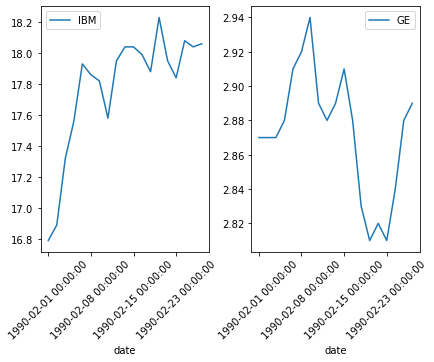

In [684]:
# Subplot array is 1x2 1 row with 2 cols.
(fig, (ax1,ax2))  = plt.subplots(1,2)
# More room between subplots
fig.tight_layout()
# Rotate the xaxis labels 45 degrees to get them to display nicer.
time_feb.plot('date',"IBM",rot=45,ax=ax1)
time_feb.plot('date',"GE",rot=45,ax=ax2)

Task: **Create a pivot table which shows  the mean prices by month for 'IBM'.**

We'd like to look at things month by month.  We need to make
grouping by month easy.  While we're at it, let's also enable year by year aggregation.  The structure
of the entries in the `'date'` column makes both things easy.

In [685]:
time1['year'] = time1['date'].apply(lambda x: int(x[:4]))
time1['month'] = time1['date'].apply(lambda x: x[:7])


Note that adding columns is not the only way to facilitate different kinds of grouping.  You can also use
`groupby`, which takes an arbitrary function to assign labels, or you can simply pass `groupby` a sequence of labels you've created.  These options are described in the `pandas` documentation; see the `pandas_doc_notes` notebook for examples.

Here is `time1` with the new columns.

In [686]:
time1

,Unnamed: 0,date,AA,GE,IBM,MSFT,year,month
0,0,1990-02-01 00:00:00,4.98,2.87,16.79,0.51,1990,1990-02
1,1,1990-02-02 00:00:00,5.04,2.87,16.89,0.51,1990,1990-02
2,2,1990-02-05 00:00:00,5.07,2.87,17.32,0.51,1990,1990-02
3,3,1990-02-06 00:00:00,5.01,2.88,17.56,0.51,1990,1990-02
4,4,1990-02-07 00:00:00,5.04,2.91,17.93,0.51,1990,1990-02
...,...,...,...,...,...,...,...,...
5467,5467,2011-10-10 00:00:00,10.09,16.14,186.62,26.94,2011,2011-10
5468,5468,2011-10-11 00:00:00,10.30,16.14,185.00,27.00,2011,2011-10
5469,5469,2011-10-12 00:00:00,10.05,16.40,186.12,26.96,2011,2011-10
5470,5470,2011-10-13 00:00:00,10.10,16.22,186.82,27.18,2011,2011-10


Now it's easy to create a pivot table which shows the month-by-month mean prices for IBM.

In [680]:
time1.pivot_table('IBM','month')

,IBM
month,
1990-02,17.781579
1990-03,18.466818
1990-04,18.767500
1990-05,20.121818
1990-06,20.933810
...,...
2011-06,164.875455
2011-07,178.204500
2011-08,169.194348


Task: **Create a DataFrame which has a single row  for each month showing the mean prices for 'IBM', "GE' and
'MSFT' for that month in separate columns.**

It would be nice to have one DataFrame which gave the month by month means for all three
stocks in `time1`; this is essentially a pivot_table task.  The issue is that 
each pivot_table command can only  apply `.mean()` to one values column;
and we have three.  

We could do three pivots and concatenate columnwise.  An alternative pandas offers is "melting";
conceptually, `melt` is the inverse of `groupby`.  We unfold 30 day rows for
April into 90 rows, 30 for each stock, by replacing the original three stock value columns with one
`values` column and adding a `variable` column to keep track of what
stock had each value:

In [676]:
time1_melt = pd.melt(time1, id_vars=['month'], value_vars=['AA', 'GE','IBM'])

In [704]:
time1_melt[time1_melt['month'] == '1990-04']

,month,variable,value
41,1990-04,AA,5.18
42,1990-04,AA,5.17
43,1990-04,AA,5.13
44,1990-04,AA,5.15
45,1990-04,AA,5.04
46,1990-04,AA,5.06
47,1990-04,AA,5.11
48,1990-04,AA,5.20
49,1990-04,AA,5.25
50,1990-04,AA,5.27


Now we can pivot into the DataFrame we want:

In [708]:
time1_month_pivot = time1_melt.pivot_table('value','month','variable')
time1_month_pivot

variable,AA,GE,IBM
month,,,
1990-02,5.043684,2.873158,17.781579
1990-03,5.362273,2.963636,18.466818
1990-04,5.141000,3.037500,18.767500
1990-05,5.278182,3.160000,20.121818
1990-06,5.399048,3.275714,20.933810
...,...,...,...
2011-06,15.390000,18.295000,164.875455
2011-07,15.648000,18.500500,178.204500
2011-08,12.353478,15.878261,169.194348


**What stock gave the best return over the  time period in the data?**

To answer this question we essentially want to perform a **delta calculation**: subtract the value on the first day from the value on the last day.  The issue is what measure of value should we use when stock share prices differ significantly in scale  (compare IBM
and MSFT in Feb 1990 in `time1`).  We need some way of scaling the price differences so
as to make them comparable.

We will present one way of doing this without a great deal of discussion because this question is essentially a pretext for showing you how to **center** and **scale** data.

Strategy:  Center and scale each stock column to show stock price in standard deviation units.
(Plot the three resulting stock price lines, for fun).  **Delta calculation**:  For each stock, compute the difference between the first and last days in the data in  standard deviation units.

The stock that is the furthest above its starting point at the end of the period is the winner.  Note that the "center" of the centering is arbitrary for this calculation.  We choose to make it the mean because that is a standard choice. But in the end we're just computing the difference in values beween the last day and the first day, and the choice of center will have no effect on that difference.

```
(x_last - c) - (x_first - c) = x_last - x_first
```

What does matter is the choice of the units we use to represent stock values.  We choose
`standard deviation units` because that is a reasonable way to standardize the prices of stocks.

The next cell actually centers and scales each column.  

In [745]:
# If you used time1 you would need to tinker with both the plot command
# and the delta calculation below, because the DataFrame index is not a sequence of time points. 
# df = time1[['AA','GE','IBM']]
df = time1_month_pivot
mn,std = df.mean(),df.std()
# centering (the numerator)  & scaling (the denominator)
new_df=(df-mn)/std

How did **that** work?  Well, `pandas` sensibly decides
that in a normally structured DataFrame, it doesn't make sense to take
the mean or standard deviation of a row  (each column is a different kind of thing),
so mean and standard deviation calculations are automatically applied to columns.

Note that for the cell above to work we should (minimally) have a DataFrame with
all numerical columns and no NaN issues (or at least NaN issues that have
been thought through in advance).  Our pivot table meets these criteria: It is all numerical with no NaNs.
Because there are no NaNs in the original DataFrame `time1`, we could have
just as easily have used the three value columns in `time1` for centering and scaling,
but we would end up with a DataFrame with no temporal index and no time related columns.

Here is the result of centering the pivot table:

In [746]:
new_df

variable,AA,GE,IBM
month,,,
1990-02,-1.288710,-1.418216,-1.172091
1990-03,-1.255604,-1.409703,-1.155745
1990-04,-1.278598,-1.402754,-1.148573
1990-05,-1.264343,-1.391229,-1.116268
1990-06,-1.251783,-1.380342,-1.096900
...,...,...,...
2011-06,-0.213580,0.032714,2.336573
2011-07,-0.186770,0.052048,2.654514
2011-08,-0.529118,-0.194660,2.439593


The brief code snippet above is in this case equivalent to the for-loop in the cell below, which might be useful code if you try to do this on a subset of the columns in a DataFrame.

In [732]:
df = time1_month_pivot
new_dict = {}
for col in df.columns:
    col_series = df[col]
    mn, std = col_series.mean(),col_series.std()
    # centering (the numerator)  & scaling (the denominator)
    new_dict[col] = (col_series - mn)/std
new_df = pd.DataFrame(new_dict)

In [733]:
new_df

,AA,GE,IBM
month,,,
1990-02,-1.288710,-1.418216,-1.172091
1990-03,-1.255604,-1.409703,-1.155745
1990-04,-1.278598,-1.402754,-1.148573
1990-05,-1.264343,-1.391229,-1.116268
1990-06,-1.251783,-1.380342,-1.096900
...,...,...,...
2011-06,-0.213580,0.032714,2.336573
2011-07,-0.186770,0.052048,2.654514
2011-08,-0.529118,-0.194660,2.439593


<AxesSubplot:xlabel='month'>

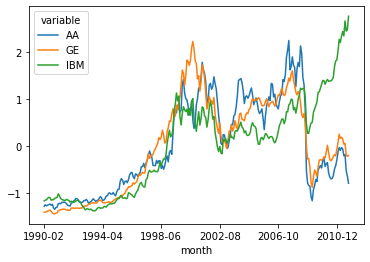

In [747]:
new_df.plot()

**Delta calculation**: The winner, as the picture suggests, is IBM.

In [748]:
(new_df.iloc[-1] - new_df.iloc[0])

variable
AA     0.491963
GE     1.210078
IBM    3.926800
dtype: float64

Same steps as above over different time period.

Different answer for what the best stock is.

In [736]:
time2 = time1[time1['year']< 2008]
time2_melt = pd.melt(time2, id_vars=['month'], value_vars=['AA', 'GE','IBM'])
time2_month_pivot = time2_melt.pivot_table('value','month','variable')
df = time2_month_pivot
mn,std = df.mean(),df.std()
# centering (the numerator)  & scaling (the denominator)
new_df=(df-mn)/std

Revised plot.

<AxesSubplot:xlabel='month'>

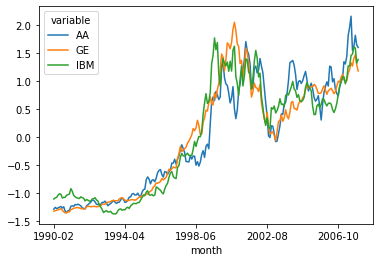

In [738]:
new_df.plot()

Revised delta calculation:

In [737]:
(new_df.iloc[-1] - new_df.iloc[0])

variable
AA     2.892419
GE     2.507379
IBM    2.496016
dtype: float64

<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  